# Day 2 - Advanced Data Handling and Databases

Welcome to Day 2 of the advanced Python course. Today we will focus on **data handling** and **databases**:

- Build powerful data transformations with **comprehensions** and **generator expressions**
- Work with **SQLite** using **SQLAlchemy** (Python ORM)
- Load data from databases into **pandas DataFrame** objects
- Explore data with pandas (filtering, derived columns, groupby, joins)
- Load and save **Excel (xlsx)** files with pandas
- Visualize results with **matplotlib**
- Finish with a **complex scientific measurement analysis example**

## Daily agenda and course flow

**09:00 - 10:30 (1h 30m)**  
- Short recap of iterators and generators from Day 1
- List, dict, and set comprehensions
- Conditional and nested comprehensions
- Generator expressions vs list comprehensions

**10:30 - 10:45 (15m)**  
- Short break (stand up, drink water, stretch)

**10:45 - 12:00 (1h 15m)**  
- Relational databases: why and when
- SQLite and SQLAlchemy basics (engine, models, sessions)
- CRUD operations (Create, Read, Update, Delete)

**12:00 - 13:00 (1h)**  
- Lunch break

**13:00 - 14:45 (1h 45m)**  
- pandas DataFrame basics
- Loading data from SQL with `pandas.read_sql`
- Loading and saving Excel files with pandas
- DataFrame filtering, derived columns, groupby, merge

**14:45 - 15:00 (15m)**  
- Short break

**15:00 - 16:30 (1h 30m)**  
- Visualization with matplotlib (through pandas)
- Complex end-to-end example: analyzing physical surface size measurement data
- Wrap up and summary

Useful official documentation:

- pandas: https://pandas.pydata.org/docs/
- SQLAlchemy: https://docs.sqlalchemy.org/en/20/
- matplotlib: https://matplotlib.org/stable/users/index.html


## 1. Recap: iterators, generators, and data pipelines

In Day 1 we talked about **iterators**, **generators**, and basic functional tools like `map`, `filter`, and `itertools`.

Key points to remember:

- An **iterator** is an object that you can loop over with `for` and that implements the iterator protocol (`__iter__` and `__next__`).
- A **generator function** is a function that uses `yield` to produce a sequence of values lazily.
- A **generator expression** is a compact way to create a generator: `(expr for x in iterable)`.

These concepts are the foundation for:

- **Comprehensions** (list, dict, set) which build new collections from existing iterables.
- **Streaming pipelines** where we transform data step by step without loading everything at once.

In real world data processing, combining iterators, generators, and comprehensions gives you **readable** and **memory efficient** code.

In [1]:
# Simple recap: generator pipeline vs for-loop

numbers = [1, 2, 3, 4, 5, 6]

# Using a generator expression and sum
squared_even_sum = sum(n * n for n in numbers if n % 2 == 0)
print("Sum of squares of even numbers (generator expression):", squared_even_sum)

# Equivalent explicit for-loop
squared_even_sum_loop = 0
for n in numbers:
    if n % 2 == 0:
        squared_even_sum_loop += n * n
print("Sum of squares of even numbers (for-loop):", squared_even_sum_loop)


Sum of squares of even numbers (generator expression): 56
Sum of squares of even numbers (for-loop): 56


### ✏ Exercise 1.1 (easy): Filter and transform with a generator

In the cell below:

1. Create a list `raw_lengths_mm` of integer lengths in millimeters, for example `[10, 25, 50, 5, 100]`.
2. Use a **generator expression** together with `sum()` to compute the **total length in meters**:
   - First convert each millimeter value to meters (`mm / 1000`).
   - Ignore values smaller than 10 mm.
3. Print the result.

Use only concepts from Day 1 and the recap example above.

In [ ]:
# TODO: implement Exercise 1.1

# raw_lengths_mm = ...
# total_length_m = ...  # use a generator expression with sum()
# print("Total length in meters:", total_length_m)


In [2]:
# Reference solution for Exercise 1.1
raw_lengths_mm = [10, 25, 50, 5, 100]

total_length_m = sum(mm / 1000 for mm in raw_lengths_mm if mm >= 10)
print("Total length in meters:", total_length_m)


Total length in meters: 0.185


### ⚡ Exercise 1.2 (advanced): Build a simple cleaning pipeline

In the cell below you will create a small generator based cleaning pipeline:

1. Create a list `raw_measurements` that contains strings like `"12.5"`, `"  9.8"`, `"N/A"`, `"15.0"`.
2. Use a generator expression to:
   - Strip whitespace from each string.
   - Filter out entries that are equal to `"N/A"`.
   - Convert the remaining entries to `float`.
3. Compute the average of the cleaned float values.
4. Print the cleaned list and the average.

Hint: you can turn the generator into a list with `list(...)` if you want to print it.

In [3]:
# TODO: implement Exercise 1.2

# raw_measurements = ...
# cleaned_values_gen = ...  # generator that strips, filters out "N/A", and converts to float
# cleaned_values_list = ...
# average = ...
# print("Cleaned values:", cleaned_values_list)
# print("Average:", average)


In [4]:
# Reference solution for Exercise 1.2
raw_measurements = ["12.5", "  9.8", "N/A", "15.0"]

cleaned_values_gen = (
    float(s.strip())
    for s in raw_measurements
    if s.strip() != "N/A"
)

cleaned_values_list = list(cleaned_values_gen)
average = sum(cleaned_values_list) / len(cleaned_values_list)

print("Cleaned values:", cleaned_values_list)
print("Average:", average)


Cleaned values: [12.5, 9.8, 15.0]
Average: 12.433333333333332


## 2. Comprehensions and generator expressions

Python comprehensions provide a **compact syntax** to create new collections from existing iterables:

- **List comprehensions**: `[expr for x in iterable if condition]`
- **Dict comprehensions**: `{key_expr: value_expr for x in iterable if condition}`
- **Set comprehensions**: `{expr for x in iterable if condition}`
- **Generator expressions**: `(expr for x in iterable if condition)`

They are very common in real code because they are:

- Concise
- Often more readable than explicit loops
- Easy to combine with other tools like `sum`, `any`, `all`, and `max`

### 2.1 List comprehensions as map + filter

A **list comprehension** is a compact way to build a list:

```python
squares = [n * n for n in range(5)]
even_squares = [n * n for n in range(10) if n % 2 == 0]
```

You can think of it as combining:

- A `for` loop that iterates over an iterable
- A transformation (like `n * n`)
- An optional filter (`if condition`)

Real world uses:

- Cleaning input data (strip, lower, filter out empty values)
- Converting measurement units (mm to m, Celsius to Kelvin, etc.)
- Extracting one field from a list of dicts (e.g. all `email` fields)

**Best practice:**

- Use list comprehensions when the transformation and the filter are **simple**.
- If the logic becomes complex (multiple branches, many lines), a normal `for` loop is usually easier to read.


In [5]:
# Example: cleaning measurement labels with a list comprehension

raw_labels = ["  SampleA  ", "SampleB", "", "  SampleC"]

clean_labels = [label.strip() for label in raw_labels if label.strip()]

print("Raw labels:", raw_labels)
print("Clean labels:", clean_labels)


Raw labels: ['  SampleA  ', 'SampleB', '', '  SampleC']
Clean labels: ['SampleA', 'SampleB', 'SampleC']


### ✏ Exercise 2.1.1 (easy): Convert Celsius to Kelvin

In the cell below:

1. Create a list `temperatures_c` with some float values in Celsius, for example `[20.0, 25.5, 0.0, -5.0]`.
2. Use a **list comprehension** to create a new list `temperatures_k` with values in Kelvin (`C + 273.15`).
3. Print both lists.


In [6]:
# TODO: implement Exercise 2.1.1

# temperatures_c = ...
# temperatures_k = ...  # list comprehension here
# print("Celsius:", temperatures_c)
# print("Kelvin:", temperatures_k)


In [7]:
# Reference solution for Exercise 2.1.1
temperatures_c = [20.0, 25.5, 0.0, -5.0]

temperatures_k = [c + 273.15 for c in temperatures_c]

print("Celsius:", temperatures_c)
print("Kelvin:", temperatures_k)


Celsius: [20.0, 25.5, 0.0, -5.0]
Kelvin: [293.15, 298.65, 273.15, 268.15]


### ⚡ Exercise 2.1.2 (advanced): Filter out unrealistic measurements

You are given a list of measured thickness values in micrometers (um). Some values are clearly invalid (negative or extremely large).

1. Create a list `thickness_um` such as `[10.0, 12.5, -3.0, 5000.0, 9.8, 11.2]`.
2. Use a **list comprehension** to create a list `valid_thickness_um` containing only values between `0` and `100.0` (inclusive).
3. Print the number of valid values and their average.

Use only tools shown so far (list comprehensions, `len`, `sum`).

In [1]:
# TODO: implement Exercise 2.1.2

thickness_um = [10.0, 12.5, -3.0, 5000.0, 9.8, 11.2]
valid_thickness_um = ...  # filter between 0 and 100.0

print("Valid thickness values:", valid_thickness_um)
print("Count:", len(valid_thickness_um))
print("Average:", sum(valid_thickness_um) / len(valid_thickness_um))


Valid thickness values: [10.0, 12.5, 9.8, 11.2]
Count: 4
Average: 10.875


In [8]:
# Reference solution for Exercise 2.1.2
thickness_um = [10.0, 12.5, -3.0, 5000.0, 9.8, 11.2]

valid_thickness_um = [t for t in thickness_um if 0 <= t <= 100.0]

print("Valid thickness values:", valid_thickness_um)
print("Count:", len(valid_thickness_um))
print("Average:", sum(valid_thickness_um) / len(valid_thickness_um))


Valid thickness values: [10.0, 12.5, 9.8, 11.2]
Count: 4
Average: 10.875


### 2.2 Dict and set comprehensions

**Dict comprehensions** build dictionaries in one expression:

```python
lengths = [1.0, 2.5, 3.0]
length_map = {i: l for i, l in enumerate(lengths)}
```

**Set comprehensions** build sets (unique elements):

```python
values = ["A", "B", "A", "C"]
unique_values = {v for v in values}
```

Real world uses:

- Building **lookup tables**: `sample_id -> average_value`
- Extracting **unique items**: set of all used measurement methods

Compared to loops:

- Less boilerplate for common patterns
- Often more readable when the transformation is simple


In [3]:
# Example: build a lookup table from sample name to average measurement

samples = [
    ("SampleA", 10.0),
    ("SampleB", 12.5),
    ("SampleA", 11.0),
]

# Compute average per sample using a simple two-pass approach
sample_values = {}
for name, value in samples:
    sample_values.setdefault(name, []).append(value)

avg_by_sample = {name: sum(vals) / len(vals) for name, vals in sample_values.items()}

print("Average by sample:", avg_by_sample)

# Example: set comprehension to get unique sample names
unique_samples = {name for name, value in samples}
print("Unique samples:", unique_samples)


Average by sample: {'SampleA': 10.8, 'SampleB': 12.5}
Unique samples: {'SampleA', 'SampleB'}


In [6]:
a = ["a", "a", "b"]
list(set(a))

['b', 'a']

### ✏ Exercise 2.2.1 (easy): Map sample to max measurement

You are given a list of `(sample_name, value)` pairs.

1. Create a list `measurements` with at least 5 tuples.
2. Build a dictionary `max_by_sample` that maps each sample name to its **maximum** value.
   - You can use a first pass with `setdefault` to collect all values per sample.
   - Use a **dict comprehension** to compute the max for each sample.
3. Print the dictionary.


In [11]:
# TODO: implement Exercise 2.2.1
# Goal:
# - Group measurements by sample name
# - Compute the maximum value for each sample
# - Store the result in `max_by_sample`

measurements = [
    ("SampleA", 10.0),
    ("SampleB", 12.5),
    ("SampleA", 15.0),
    ("SampleA", 11.0),
    ("SampleB", 1.0),
]

# TODO: group values by sample name
grouped = {}

# TODO: compute max value per sample
max_by_sample = {}

print("Max by sample:", max_by_sample)


Max by sample: {'SampleA': 15.0, 'SampleB': 12.5}


In [11]:
# Reference solution for Exercise 2.2.1
measurements = [
    ("S1", 1.2),
    ("S2", 0.9),
    ("S1", 1.5),
    ("S3", 2.0),
    ("S2", 1.1),
]

grouped = {}
for name, value in measurements:
    grouped.setdefault(name, []).append(value)

max_by_sample = {name: max(vals) for name, vals in grouped.items()}
print("Max by sample:", max_by_sample)


Max by sample: {'S1': 1.5, 'S2': 1.1, 'S3': 2.0}


### ⚡ Exercise 2.2.2 (advanced): Extract unique measurement methods

You have a list of dicts where each dict represents a measurement entry:

```python
{"sample": "S1", "method": "optical", "value": 10.2}
```

1. Create such a list named `records` with at least 6 items and at least 3 different methods.
2. Use a **set comprehension** to build a set `methods` containing all unique methods.
3. Print the set.
4. Bonus: build a dict `count_by_method` that counts how many records there are per method using a loop and a dict comprehension or direct loop.


In [12]:
# TODO: implement Exercise 2.2.2
# Goal:
# - Work with a list of measurement records (dicts)
# - Extract unique measurement methods
# - Count how many records exist per method (bonus)

records = [
    {"sample": "S1", "method": "optical", "value": 10.2},
    {"sample": "S1", "method": "haptic", "value": 10.2},
    {"sample": "S1", "method": "ultrasonic", "value": 10.2},
    {"sample": "S1", "method": "ultrasonic", "value": 10.2},
    {"sample": "S1", "method": "ruler", "value": 10.2},
    {"sample": "S1", "method": "optical", "value": 10.2},
]

# TODO:
# Use a set comprehension to extract all unique measurement methods
methods = set()

print("Methods:", methods)

# BONUS TODO:
# Count how many records exist per method
# Store the result in count_by_method
count_by_method = {}

print("Count by method:", count_by_method)


Methods: {'ruler', 'ultrasonic', 'optical', 'haptic'}
Count by method: {'optical': 2, 'haptic': 1, 'ultrasonic': 2, 'ruler': 1}


In [12]:
# Reference solution for Exercise 2.2.2
records = [
    {"sample": "S1", "method": "optical", "value": 10.2},
    {"sample": "S2", "method": "contact", "value": 9.8},
    {"sample": "S1", "method": "optical", "value": 10.4},
    {"sample": "S3", "method": "afm", "value": 5.1},
    {"sample": "S2", "method": "contact", "value": 9.9},
    {"sample": "S4", "method": "optical", "value": 11.0},
]

methods = {rec["method"] for rec in records}
print("Methods:", methods)

count = {}
for rec in records:
    m = rec["method"]
    count[m] = count.get(m, 0) + 1

count_by_method = count
print("Count by method:", count_by_method)


Methods: {'afm', 'optical', 'contact'}
Count by method: {'optical': 3, 'contact': 2, 'afm': 1}


### 2.3 Conditional and nested comprehensions

Comprehensions can contain:

- An **if condition** to filter elements:
  ```python
  large_values = [x for x in values if x > 10]
  ```
- Multiple `for` clauses to create combinations or flatten nested iterables:
  ```python
  pairs = [(i, j) for i in range(3) for j in range(2)]
  flattened = [x for row in matrix for x in row]
  ```

Use these carefully:

- Great for simple flattening or filtering.
- If you need multiple nested loops with complex logic, a normal `for` structure is easier to read.


In [14]:
# Example: flatten nested measurements and filter

nested_measurements = [
    [0.9, 1.0, 1.1],
    [1.2, 0.8],
    [1.5, 1.3, 0.7],
]

flattened = [value for row in nested_measurements for value in row]

valid = [value for row in nested_measurements for value in row if value >= 1.0]

print("Flattened:", flattened)
print("Valid (>= 1.0):", valid)


Flattened: [0.9, 1.0, 1.1, 1.2, 0.8, 1.5, 1.3, 0.7]
Valid (>= 1.0): [1.0, 1.1, 1.2, 1.5, 1.3]


### ✏ Exercise 2.3.1 (easy): Flatten 2D measurement grid

You are given a 2D grid of measurement results (list of lists). For example:

```python
grid = [
    [1.0, 1.1, 0.9],
    [1.2, 1.0, 1.3],
]
```

1. Create your own `grid` with at least 2 rows and 3 columns.
2. Use a **nested list comprehension** to flatten it into a single list `values`.
3. Print the flattened list.


In [ ]:
# TODO: implement Exercise 2.3.1

# grid = ...
# values = ...  # nested list comprehension
# print("Flattened values:", values)


In [14]:
# Reference solution for Exercise 2.3.1
grid = [
    [1.0, 1.1, 0.9],
    [1.2, 1.0, 1.3],
]

values = [v for row in grid for v in row]
print("Flattened values:", values)


Flattened values: [1.0, 1.1, 0.9, 1.2, 1.0, 1.3]


### ⚡ Exercise 2.3.2 (advanced): All sample-method combinations

You have:

- A list of sample names, `samples = ["S1", "S2", "S3"]`
- A list of methods, `methods = ["optical", "contact"]`

1. Use a nested list comprehension to create all `(sample, method)` pairs.
2. Then extend this idea: assume you have a list of sample names and methods, and you only want combinations where the sample name is not `"S2"`. Use a conditional in the comprehension.
3. Print both lists.


In [15]:
# TODO: implement Exercise 2.3.2

# samples = ["S1", "S2", "S3"]
# methods = ["optical", "contact"]

# all_pairs = ...
# filtered_pairs = ...  # exclude S2

# print("All pairs:", all_pairs)
# print("Filtered pairs (excluding S2):", filtered_pairs)


In [16]:
# Reference solution for Exercise 2.3.2
samples = ["S1", "S2", "S3"]
methods = ["optical", "contact"]

all_pairs = [(s, m) for s in samples for m in methods]
filtered_pairs = [(s, m) for s in samples for m in methods if s != "S2"]

print("All pairs:", all_pairs)
print("Filtered pairs (excluding S2):", filtered_pairs)


All pairs: [('S1', 'optical'), ('S1', 'contact'), ('S2', 'optical'), ('S2', 'contact'), ('S3', 'optical'), ('S3', 'contact')]
Filtered pairs (excluding S2): [('S1', 'optical'), ('S1', 'contact'), ('S3', 'optical'), ('S3', 'contact')]


### 2.4 Generator expressions vs list comprehensions

Syntax is almost the same:

- List comprehension: `[expr for x in iterable if condition]`
- Generator expression: `(expr for x in iterable if condition]`

Key differences:

- A **list comprehension** builds the **entire list in memory**.
- A **generator expression** produces values **on demand**.

Use a generator expression when:

- You only need to iterate once (for example with `sum`, `any`, `all`).
- You want to avoid storing all intermediate results.

Use a list comprehension when:

- You need random access or to iterate multiple times.
- You want to inspect the full list.

Trivia: generator expressions are essentially a compact syntax for a generator function, just like list comprehensions are a compact syntax for building lists.

In [17]:
# Example: generator expression vs list comprehension

values = [1, 2, 3, 4, 5]

# List comprehension
squares_list = [v * v for v in values]
print("List of squares:", squares_list)

# Generator expression
squares_gen = (v * v for v in values)
print("Sum of squares (generator):", sum(squares_gen))

# If we try to sum again, the generator is exhausted
print("Sum of squares again (generator):", sum(squares_gen))


List of squares: [1, 4, 9, 16, 25]
Sum of squares (generator): 55
Sum of squares again (generator): 0


### ✏ Exercise 2.4.1 (easy): Generator for threshold counting

In the cell below:

1. Create a list `areas_mm2` of at least 6 area values in square millimeters.
2. Use a **generator expression** with `sum()` to count how many values are above a threshold (for example `50.0`).
   - Hint: `sum(1 for x in areas_mm2 if x > threshold)`.
3. Print the count.


In [ ]:
# TODO: implement Exercise 2.4.1

# areas_mm2 = ...
# threshold = ...
# count_above = ...  # generator expression inside sum()
# print("Count above threshold:", count_above)


In [18]:
# Reference solution for Exercise 2.4.1
areas_mm2 = [10.0, 60.0, 55.5, 30.0, 80.0, 5.0]
threshold = 50.0

count_above = sum(1 for a in areas_mm2 if a > threshold)
print("Count above threshold:", count_above)


Count above threshold: 3


### ⚡ Exercise 2.4.2 (advanced): Compare memory usage conceptually

This is a **conceptual** exercise (no real memory measurement):

1. Imagine you have one million measurement values.
2. In the code cell below, write a function `process_with_list(values)` that:
   - Builds a list of squares with a list comprehension.
   - Returns the sum of these squares.
3. Write another function `process_with_gen(values)` that:
   - Uses a generator expression inside `sum()` and does not build the list.
4. Use a small list (for example `range(10)`) to call both functions and print their outputs.

Think about which approach would use more memory for very large inputs and why.


In [ ]:
# TODO: implement Exercise 2.4.2

# def process_with_list(values):
#     ...

# def process_with_gen(values):
#     ...

# small = list(range(10))
# print("List version:", process_with_list(small))
# print("Gen version:", process_with_gen(small))


In [19]:
# Reference solution for Exercise 2.4.2

def process_with_list(values):
    squares = [v * v for v in values]
    return sum(squares)


def process_with_gen(values):
    return sum(v * v for v in values)

small = list(range(10))
print("List version:", process_with_list(small))
print("Gen version:", process_with_gen(small))


List version: 285
Gen version: 285


---
# Short break (10:30 - 10:45)

Stand up, move a bit, get some fresh air if you can.

After the break we switch to databases.
---

## 3. Relational databases and SQLite

A **relational database** stores data in **tables** with rows and columns.

Key concepts:

- **Table**: like a spreadsheet sheet, with named columns.
- **Row**: one record in the table.
- **Primary key (PK)**: a column (or columns) that uniquely identifies each row.
- **Foreign key (FK)**: a column that references a primary key in another table.

Examples of relational databases: PostgreSQL, MySQL, SQLite, SQL Server.

### Why SQLite here?

- It is an **embedded** database: just a file on disk, no server to manage.
- Perfect for demos, tests, and small applications.
- Python ships with an `sqlite3` module, and libraries like SQLAlchemy can use SQLite easily.

SQLAlchemy documentation: https://docs.sqlalchemy.org/en/20/

In this course we will use **SQLAlchemy** as an **Object-Relational Mapper (ORM)**:

- We define Python classes that represent tables.
- We create and query objects instead of writing raw SQL manually.
Under the hood, SQLAlchemy still generates SQL queries.


### ✏ Exercise 3.1 (conceptual): Design simple tables

In the cell below (as comments), describe a possible relational schema for storing measurement data:

- At least one table for samples (for example: `samples` with columns `id`, `name`, `material`).
- At least one table for measurements (for example: `measurements` with columns `id`, `sample_id`, `method`, `value`).

Write your answer as Python comments describing the columns and which column would be a primary key and a foreign key.


In [ ]:
# TODO: write your schema idea as comments

# Example structure (delete and write your own):
# Table samples: id (PK), name, material
# Table measurements: id (PK), sample_id (FK to samples.id), method, value


In [ ]:
# Reference solution for Exercise 3.1 (one possible answer)

# Table samples:
#   - id: integer, primary key
#   - name: text, sample identifier
#   - material: text, description
#
# Table measurements:
#   - id: integer, primary key
#   - sample_id: integer, foreign key to samples.id
#   - method: text (for example "optical", "contact")
#   - value: float (measured surface size or thickness)
#   - unit: text (for example "mm^2")


## 4. SQLAlchemy basics: engine, models, sessions

To use SQLAlchemy with SQLite we typically:

1. Create an **Engine** that knows how to talk to the database.
2. Define **model classes** using a **declarative base**.
3. Create a **Session** to add, query, update, and delete objects.

Documentation pages:

- SQLAlchemy ORM tutorial: https://docs.sqlalchemy.org/en/20/orm/quickstart.html


In [22]:
# Basic SQLAlchemy setup for SQLite

from sqlalchemy import create_engine, Column, Integer, String, Float, ForeignKey
from sqlalchemy.orm import declarative_base, sessionmaker

# Create an engine that stores data in the local file day2_measurements.db
engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

Base = declarative_base()

class Sample(Base):
    __tablename__ = "samples"

    id = Column(Integer, primary_key=True)
    name = Column(String, nullable=False)
    material = Column(String, nullable=True)

class Measurement(Base):
    __tablename__ = "measurements"

    id = Column(Integer, primary_key=True)
    sample_id = Column(Integer, ForeignKey("samples.id"), nullable=False)
    method = Column(String, nullable=False)
    value = Column(Float, nullable=False)
    unit = Column(String, nullable=False)

# Create all tables
Base.metadata.create_all(engine)

# Release the db file
engine.dispose()

print("Database and tables created.")


Database and tables created.


In [25]:
# Jupyter cell: inspect an SQLite database with SQLAlchemy
# --------------------------------------------------------
# - Connects to the SQLite file
# - Lists all tables
# - Displays all rows from each table as a pandas DataFrame
# - Properly releases the connection so the file can be deleted later

import pandas as pd
from sqlalchemy import create_engine, inspect, text
from IPython.display import display, Markdown

# Change this to your SQLite file path
db_path = "day2_measurements.db"  # e.g. "my_database.sqlite"

# Create an engine; everything is wrapped so we clean up properly at the end
engine = create_engine(f"sqlite:///{db_path}", future=True)

try:
    inspector = inspect(engine)
    table_names = inspector.get_table_names()

    if not table_names:
        display(Markdown(f"**No tables found in `{db_path}`**"))
    else:
        display(Markdown(f"## SQLite database: `{db_path}`"))
        display(Markdown("Found tables: `" + "`, `".join(table_names) + "`"))

        # Use a single connection for all reads
        with engine.connect() as conn:
            for table in table_names:
                display(Markdown(f"### Table: `{table}`"))
                # Use a simple SELECT *; quoting table name for safety
                query = text(f'SELECT * FROM "{table}"')
                df = pd.read_sql(query, conn)
                display(df)

finally:
    # Ensure all connections are fully closed and the file is released
    engine.dispose()
    # Optionally remove the engine name from the global namespace
    try:
        del engine
    except NameError:
        pass


## SQLite database: `day2_measurements.db`

Found tables: `calibrations`, `measurements`, `samples`

### Table: `calibrations`

,id,method,factor


### Table: `measurements`

,id,sample_id,method,value,unit
0,1,1,optical,10.2,mm^2
1,2,1,contact,9.8,mm^2
2,3,2,optical,15.0,mm^2
3,4,3,optical,10.2,mm^2
4,5,3,contact,9.8,mm^2
5,6,4,optical,15.0,mm^2
6,7,5,optical,10.2,mm^2
7,8,5,contact,9.8,mm^2
8,9,6,optical,15.0,mm^2


### Table: `samples`

,id,name,material
0,1,SampleA,Steel
1,2,SampleB,Aluminum
2,3,SampleA,Steel
3,4,SampleB,Aluminum
4,5,SampleA,Steel
5,6,SampleB,Aluminum


### ✏ Exercise 4.1 (easy): Add a calibration table

In many labs, measurement devices are calibrated. We want a table to store calibration factors.

1. Define a new model class `Calibration` with:
   - `id` (integer primary key)
   - `method` (string, for example "optical")
   - `factor` (float)
2. Add it to the same `Base` so `Base.metadata.create_all(engine)` will create it.
3. Call `Base.metadata.create_all(engine)` again to create the new table.

Use the example of `Sample` and `Measurement` as a template.


In [18]:
# TODO: implement Exercise 4.1

from sqlalchemy import create_engine, Column, Integer, String, Float
from sqlalchemy.orm import declarative_base

engine = create_engine("sqlite:///...", echo=False, future=True)

Base = declarative_base()

class Calibration(Base):
    __tablename__ = "..."

    id = Column(Integer, primary_key=True)
    method = ....
    factor = ...


# TODO: create tables 

# TODO: dispose


In [7]:
# Reference solution for Exercise 4.1
from sqlalchemy import Float as SAFloat

# Create an engine that stores data in the local file day2_measurements.db
engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

Base = declarative_base()

class Calibration(Base):
    __tablename__ = "calibrations"

    id = Column(Integer, primary_key=True)
    method = Column(String, nullable=False)
    factor = Column(SAFloat, nullable=False)

Base.metadata.create_all(engine)
print("Calibration table created.")

# Release the db file
engine.dispose()


Calibration table created.


### 4.1 Sessions and CRUD operations

A **Session** represents a conversation with the database:

- `session.add(obj)` to add a new object (INSERT)
- `session.query(Model)` or modern `session.execute(select(Model))` to read rows (SELECT)
- Modify object attributes and `session.commit()` to update rows (UPDATE)
- `session.delete(obj)` to delete rows (DELETE)

We will use `SessionLocal()` to get a session.


In [32]:
# Example: insert and query some samples and measurements

from sqlalchemy import select

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)
SessionLocal = sessionmaker(bind=engine, future=True)
session = SessionLocal()

# Insert some samples
sample_a = Sample(name="SampleA", material="Steel")
sample_b = Sample(name="SampleB", material="Aluminum")

session.add_all([sample_a, sample_b])
session.commit()

print("Inserted samples with IDs:", sample_a.id, sample_b.id)

# Insert some measurements
m1 = Measurement(sample_id=sample_a.id, method="optical", value=10.2, unit="mm^2")
m2 = Measurement(sample_id=sample_a.id, method="contact", value=9.8, unit="mm^2")
m3 = Measurement(sample_id=sample_b.id, method="optical", value=15.0, unit="mm^2")

session.add_all([m1, m2, m3])
session.commit()

print("Inserted measurements.")

# Query measurements for SampleA
stmt = select(Measurement).where(Measurement.sample_id == sample_a.id)
# SELECT * FROM measurements WHERE measurements.sample_id = 1
rows = session.execute(stmt).scalars().all()

print("Measurements for SampleA:")
for row in rows:
    print(row)
    print(f"id={row.id}, method={row.method}, value={row.value} {row.unit}")

engine.dispose()


Inserted samples with IDs: 7 8
Inserted measurements.
Measurements for SampleA:
id=10, method=optical, value=10.2 mm^2
id=11, method=contact, value=9.8 mm^2


### ✏ Exercise 4.2.1 (easy): Query by method

In the cell below:

1. Use the existing `session` and `Measurement` model.
2. Query all measurements where `method` is equal to "optical".
3. Print the `id`, `sample_id`, and `value` for each result.

Use the `select` and `session.execute(...).scalars().all()` pattern from the example above.


In [34]:
# TODO: implement Exercise 4.2.1

# from sqlalchemy import select

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)
SessionLocal = sessionmaker(bind=engine, future=True)
session = SessionLocal()

# TODO: Query measurements for SampleA


print("Measurements with method='optical':")
for row in rows:
    print(f"id={row.id}, sample_id={row.sample_id}, value={row.value} {row.unit}")


engine.dispose()


Measurements with method='optical':
id=1, sample_id=1, value=10.2 mm^2
id=3, sample_id=2, value=15.0 mm^2
id=4, sample_id=3, value=10.2 mm^2
id=6, sample_id=4, value=15.0 mm^2
id=7, sample_id=5, value=10.2 mm^2
id=9, sample_id=6, value=15.0 mm^2
id=10, sample_id=7, value=10.2 mm^2
id=12, sample_id=8, value=15.0 mm^2


In [9]:
# Reference solution for Exercise 4.2.1

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)
SessionLocal = sessionmaker(bind=engine, future=True)
session = SessionLocal()

stmt = select(Measurement).where(Measurement.method == "optical")
rows = session.execute(stmt).scalars().all()

print("Optical measurements:")
for row in rows:
    print(f"id={row.id}, sample_id={row.sample_id}, value={row.value} {row.unit}")

engine.dispose()

Optical measurements:
id=1, sample_id=1, value=10.2 mm^2
id=3, sample_id=2, value=15.0 mm^2


### ⚡ Exercise 4.2.2 (advanced): Update and delete

In the cell below you will:

1. Find one measurement with method "contact" using a `select` query.
2. Update its `value` by adding `0.1` (for example, a small calibration correction).
3. Commit the session and print the updated row.
4. Then delete one measurement with method "contact" (it can be the same or another one) and commit again.
5. Finally, print all remaining measurements.

Use only patterns shown in the example and in Exercise 4.2.1.


In [ ]:
# TODO: implement Exercise 4.2.2

# engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)
# SessionLocal = sessionmaker(bind=engine, future=True)
# session = SessionLocal()

# 1. Find one contact measurement
# stmt = ...
# row = ...
# if row is not None:
#     row.value = ...  # add 0.1
#     session.commit()
#     print("Updated row:", ...)

# 2. Delete one contact measurement
# stmt = ...
# row_to_delete = ...
# if row_to_delete is not None:
#     session.delete(...)
#     session.commit()

# 3. Print all remaining measurements
# stmt = ...
# all_rows = ...
# for r in all_rows:
#     print(...)

# engine.dispose()


1 optical 10.2
3 optical 15.0
4 optical 10.2
6 optical 15.0
7 optical 10.2
9 optical 15.0
10 optical 10.2
12 optical 15.0


In [10]:
# Reference solution for Exercise 4.2.2

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)
SessionLocal = sessionmaker(bind=engine, future=True)
session = SessionLocal()


stmt = select(Measurement).where(Measurement.method == "contact")
row = session.execute(stmt).scalars().first()
if row is not None:
    row.value = row.value + 0.1
    session.commit()
    print("Updated contact row:", row.id, row.value)

stmt = select(Measurement).where(Measurement.method == "contact")
row_to_delete = session.execute(stmt).scalars().first()
if row_to_delete is not None:
    session.delete(row_to_delete)
    session.commit()
    print("Deleted contact row with id:", row_to_delete.id)

stmt = select(Measurement)
all_rows = session.execute(stmt).scalars().all()
print("All remaining measurements:")
for r in all_rows:
    print(r.id, r.method, r.value)

engine.dispose()


Updated contact row: 2 9.9
Deleted contact row with id: 2
All remaining measurements:
1 optical 10.2
3 optical 15.0


---
# Lunch break (12:00 - 13:00)

Time to rest your brain. After lunch we continue with pandas and Excel.
---

## 5. pandas DataFrame basics

**pandas** is the standard library for data analysis in Python.

Key object: **DataFrame**

- A table-like structure with labeled columns.
- Integrates well with NumPy, matplotlib, and SQL.

Docs: https://pandas.pydata.org/docs/

Common ways to create a DataFrame:

- From a list of dicts
- From a dict of lists
- From a SQL query
- From CSV or Excel files


In [47]:
# Basic DataFrame example

import pandas as pd

sample_data = [
    {"sample": "SampleA", "method": "optical", "value": 10.2},
    {"sample": "SampleA", "method": "contact", "value": 9.8},
    {"sample": "SampleB", "method": "optical", "value": 15.0},
]

df = pd.DataFrame(sample_data)

print("DataFrame head():")
display(df.head())

print("\nInfo:")
df.info()

df

DataFrame head():


,sample,method,value
0,SampleA,optical,10.2
1,SampleA,contact,9.8
2,SampleB,optical,15.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sample  3 non-null      object 
 1   method  3 non-null      object 
 2   value   3 non-null      float64
dtypes: float64(1), object(2)
memory usage: 204.0+ bytes


,sample,method,value
0,SampleA,optical,10.2
1,SampleA,contact,9.8
2,SampleB,optical,15.0


In [50]:
print(df)

    sample   method  value
0  SampleA  optical   10.2
1  SampleA  contact    9.8
2  SampleB  optical   15.0


### ✏ Exercise 5.1.1 (easy): Create a DataFrame from a dict

In the cell below:

1. Create a dict `data` with keys `"sample"`, `"area_mm2"`, `"method"`.
2. Each key should map to a list of at least 4 values.
3. Create a DataFrame `df` from this dict.
4. Print `df.head()` and `df.describe()`.


In [ ]:
# TODO: implement Exercise 5.1.1

# data = ...
# df = ...
# display(df.head())
# display(df.describe())


,sample,area_mm2,method
0,s1,10.0,optical
1,s2,12.5,contact
2,s3,9.8,optical
3,s4,15.3,afm


,area_mm2
count,4.000000
mean,11.900000
std,2.578113
min,9.800000
25%,9.950000
50%,11.250000
75%,13.200000
max,15.300000


In [18]:
# Reference solution for Exercise 5.1.1
data = {
    "sample": ["S1", "S2", "S3", "S4"],
    "area_mm2": [10.0, 12.5, 9.8, 15.3],
    "method": ["optical", "contact", "optical", "afm"],
}

df = pd.DataFrame(data)
display(df.head())
display(df.describe())


,sample,area_mm2,method
0,S1,10.0,optical
1,S2,12.5,contact
2,S3,9.8,optical
3,S4,15.3,afm


,area_mm2
count,4.000000
mean,11.900000
std,2.578113
min,9.800000
25%,9.950000
50%,11.250000
75%,13.200000
max,15.300000


### ⚡ Exercise 5.1.2 (advanced): Derived column for unit conversion

In the cell below:

1. Reuse the DataFrame from Exercise 5.1.1 (or create a similar one).
2. Add a new column `area_cm2` that converts `area_mm2` to square centimeters: `1 cm^2 = 100 mm^2`.
3. Print the updated DataFrame.
4. Bonus: compute and print the mean of `area_cm2`.


In [ ]:
# TODO: implement Exercise 5.1.2

# df["area_cm2"] = ...
# display(df)
# print("Mean area in cm^2:", ...)


,sample,area_mm2,method,area_cm2
0,s1,10.0,optical,0.100
1,s2,12.5,contact,0.125
2,s3,9.8,optical,0.098
3,s4,15.3,afm,0.153


Mean area in cm^2: Ellipsis


In [103]:
data = {
    "sample": ["s1", "s2", "s3", "s4"],
    "area_mm2": [10, 12.5, 9.8, 15.3],
    "method": ["optical", "contact", "optical", "afm"],
}
df = pd.DataFrame(data)

display(df)
print(type(df["area_mm2"]))
print(df["area_mm2"])
df.iloc[2:, 1] = 99
print(df["area_mm2"])
display(df)

,sample,area_mm2,method
0,s1,10.0,optical
1,s2,12.5,contact
2,s3,9.8,optical
3,s4,15.3,afm


<class 'pandas.core.series.Series'>
0    10.0
1    12.5
2     9.8
3    15.3
Name: area_mm2, dtype: float64
0    10.0
1    12.5
2    99.0
3    99.0
Name: area_mm2, dtype: float64


,sample,area_mm2,method
0,s1,10.0,optical
1,s2,12.5,contact
2,s3,99.0,optical
3,s4,99.0,afm


In [102]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
# Reference solution for Exercise 5.1.2
data = {
    "sample": ["S1", "S2", "S3", "S4"],
    "area_mm2": [10.0, 12.5, 9.8, 15.3],
    "method": ["optical", "contact", "optical", "afm"],
}

df = pd.DataFrame(data)
df["area_cm2"] = df["area_mm2"] / 100.0
display(df)
print("Mean area in cm^2:", df["area_cm2"].mean())


,sample,area_mm2,method,area_cm2
0,S1,10.0,optical,0.100
1,S2,12.5,contact,0.125
2,S3,9.8,optical,0.098
3,S4,15.3,afm,0.153


Mean area in cm^2: 0.119


## 6. Loading data from SQL into pandas

pandas can read from SQL using:

- `pd.read_sql_table(table_name, con)`
- `pd.read_sql_query(sql_query, con)`
- `pd.read_sql(sql, con)` (a convenience wrapper)

The connection `con` can be:

- A SQLAlchemy engine
- A DB-API connection object

Docs: https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html


In [104]:
# Example: load measurements table into a DataFrame

# We already have an engine and Measurement table
engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

measurements_df = pd.read_sql_table("measurements", con=engine)

print("Measurements DataFrame:")
display(measurements_df.head())

engine.dispose()

Measurements DataFrame:


,id,sample_id,method,value,unit
0,1,1,optical,10.2,mm^2
1,3,2,optical,15.0,mm^2
2,4,3,optical,10.2,mm^2
3,6,4,optical,15.0,mm^2
4,7,5,optical,10.2,mm^2


### ✏ Exercise 6.1.1 (easy): Load samples table into pandas

In the cell below:

1. Use `pd.read_sql_table` to load the `samples` table into a DataFrame called `samples_df`.
2. Print `samples_df`.


In [ ]:
# TODO: implement Exercise 6.1.1

# engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

# samples_df = ...
# display(samples_df)

# engine.dispose()

,id,name,material
0,1,SampleA,Steel
1,2,SampleB,Aluminum
2,3,SampleA,Steel
3,4,SampleB,Aluminum
4,5,SampleA,Steel
5,6,SampleB,Aluminum
6,7,SampleA,Steel
7,8,SampleB,Aluminum


In [21]:
# Reference solution for Exercise 6.1.1

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

samples_df = pd.read_sql_table("samples", con=engine)
display(samples_df)

engine.dispose()

,id,name,material
0,1,SampleA,Steel
1,2,SampleB,Aluminum


### ⚡ Exercise 6.1.2 (advanced): Load filtered data with read_sql_query

In the cell below:

1. Use `pd.read_sql_query` with a SQL `SELECT` query that loads only measurements with method "optical".
2. Store the result in `optical_df`.
3. Print `optical_df` and use `.describe()` on the `value` column.


In [ ]:
# TODO: implement Exercise 6.1.2

# engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

# sql = "SELECT * FROM measurements WHERE method = 'optical'"
# optical_df = ...
# display(optical_df)
# print(optical_df["value"].describe())

# engine.dispose()

,id,sample_id,method,value,unit
0,1,1,optical,10.2,mm^2
1,3,2,optical,15.0,mm^2
2,4,3,optical,10.2,mm^2
3,6,4,optical,15.0,mm^2
4,7,5,optical,10.2,mm^2
5,9,6,optical,15.0,mm^2
6,10,7,optical,10.2,mm^2
7,12,8,optical,15.0,mm^2


count     8.000000
mean     12.600000
std       2.565708
min      10.200000
25%      10.200000
50%      12.600000
75%      15.000000
max      15.000000
Name: value, dtype: float64


In [24]:
# Reference solution for Exercise 6.1.2

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

sql = "SELECT * FROM measurements WHERE method = 'optical'"
optical_df = pd.read_sql_query(sql, con=engine)
display(optical_df)
print(optical_df["value"].describe())

engine.dispose()

,id,sample_id,method,value,unit
0,1,1,optical,10.2,mm^2
1,3,2,optical,15.0,mm^2


count     2.000000
mean     12.600000
std       3.394113
min      10.200000
25%      11.400000
50%      12.600000
75%      13.800000
max      15.000000
Name: value, dtype: float64


## 7. Loading and saving Excel (xlsx) with pandas

pandas can read and write Excel files using:

- `pd.read_excel("file.xlsx")`
- `df.to_excel("file.xlsx", index=False)`

Requirements:

- You usually need an Excel engine like `openpyxl` installed. Many distributions already include it.

Docs: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html


In [110]:
# Example: save DataFrame to Excel and load it back

# Use the measurements_df from earlier (or recreate a small DataFrame if needed)
if "measurements_df" not in globals():
    measurements_df = pd.DataFrame([
        {"id": 1, "sample_id": 1, "method": "optical", "value": 10.2, "unit": "mm^2"},
        {"id": 2, "sample_id": 1, "method": "contact", "value": 9.8, "unit": "mm^2"},
    ])

excel_path = "measurements_export.xlsx"
measurements_df.to_excel(excel_path, index=False)

print(f"Saved measurements to {excel_path}")

loaded_from_excel = pd.read_excel(excel_path)
print("Loaded back from Excel:")
print(loaded_from_excel.head())


Saved measurements to measurements_export.xlsx
Loaded back from Excel:
   id  sample_id   method  value  unit
0   1          1  optical   10.2  mm^2
1   3          2  optical   15.0  mm^2
2   4          3  optical   10.2  mm^2
3   6          4  optical   15.0  mm^2
4   7          5  optical   10.2  mm^2


In [115]:
all_sheets = pd.read_excel(excel_path, sheet_name = None)
all_sheets["Sheet2"]

,id,sample_id,method,value,unit
0,1,1,optical,10.2,mm^2
1,3,2,optical,15.0,mm^2
2,4,3,optical,10.2,mm^2


### ✏ Exercise 7.1.1 (easy): Export samples to Excel

In the cell below:

1. Load the `samples` table into a DataFrame `samples_df` (if not already loaded).
2. Save it to an Excel file named `samples_export.xlsx` without the index.
3. Load it back into a new DataFrame `samples_from_excel` and print it.


In [ ]:
# TODO: implement Exercise 7.1.1

# engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

# samples_df = ...
# samples_df.to_excel("samples_export.xlsx", index=False)
# samples_from_excel = ...
# display(samples_from_excel)

# engine.dispose()

,id,name,material
0,1,SampleA,Steel
1,2,SampleB,Aluminum
2,3,SampleA,Steel
3,4,SampleB,Aluminum
4,5,SampleA,Steel
5,6,SampleB,Aluminum
6,7,SampleA,Steel
7,8,SampleB,Aluminum


In [26]:
# Reference solution for Exercise 7.1.1

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

samples_df = pd.read_sql_table("samples", con=engine)

samples_excel_path = "samples_export.xlsx"
samples_df.to_excel(samples_excel_path, index=False)

samples_from_excel = pd.read_excel(samples_excel_path)
display(samples_from_excel)

engine.dispose()

,id,name,material
0,1,SampleA,Steel
1,2,SampleB,Aluminum


### ⚡ Exercise 7.1.2 (advanced): Round and export

In the cell below:

1. Take the `measurements_df` DataFrame (or recreate it from SQL).
2. Create a copy where the `value` column is rounded to 2 decimal places.
3. Save this rounded DataFrame to `measurements_rounded.xlsx`.
4. Load it back and print the first few rows.


In [ ]:
# TODO: implement Exercise 7.1.2

# engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

# measurements_df = ...
# rounded = ...
# rounded["value"] = ...  # round to 2 decimals
# rounded.to_excel("measurements_rounded.xlsx", index=False)
# loaded = ...
# display(loaded.head())

# engine.dispose()

,id,sample_id,method,value,unit
0,1,1,optical,10.2,mm^2
1,3,2,optical,15.0,mm^2
2,4,3,optical,10.2,mm^2
3,6,4,optical,15.0,mm^2
4,7,5,optical,10.2,mm^2


In [27]:
# Reference solution for Exercise 7.1.2

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

measurements_df = pd.read_sql_table("measurements", con=engine)

rounded = measurements_df.copy()
rounded["value"] = rounded["value"].round(2)

rounded.to_excel("measurements_rounded.xlsx", index=False)
loaded = pd.read_excel("measurements_rounded.xlsx")
display(loaded.head())

engine.dispose()

,id,sample_id,method,value,unit
0,1,1,optical,10.2,mm^2
1,3,2,optical,15.0,mm^2


## 8. DataFrame operations: selection, filtering, and derived columns

Some common operations:

- Select a column: `df["value"]`
- Filter rows: `df[df["value"] > 10]`
- Create a derived column: `df["value_scaled"] = df["value"] * factor`

These are vectorized operations: pandas applies them to entire columns efficiently.


In [139]:
measurements_df = pd.DataFrame([
    {"sample_id": 1, "method": "optical", "value": 10.2, "unit": "mm^2", "b": False},
    {"sample_id": 1, "method": "contact", "value": 9.8, "unit": "mm^2", "b": False},
    {"sample_id": 2, "method": "optical", "value": 15.0, "unit": "mm^2", "b": True},
])
measurements_df.loc[measurements_df["value"] > 10, "value"] = -1
measurements_df

,sample_id,method,value,unit,b
0,1,optical,-1.0,mm^2,False
1,1,contact,9.8,mm^2,False
2,2,optical,-1.0,mm^2,True


In [140]:
# Example: filter and derive columns

# Recreate a small DataFrame for clarity
measurements_df = pd.DataFrame([
    {"sample_id": 1, "method": "optical", "value": 10.2, "unit": "mm^2"},
    {"sample_id": 1, "method": "contact", "value": 9.8, "unit": "mm^2"},
    {"sample_id": 2, "method": "optical", "value": 15.0, "unit": "mm^2"},
])

# Filter optical measurements
optical_only = measurements_df[measurements_df["method"] == "optical"]
print("Optical only:")
print(optical_only)

# Derived column: convert area from mm^2 to um^2 (1 mm^2 = 1e6 um^2)
measurements_df["value_um2"] = measurements_df["value"] * 1e6
print("\nWith derived column value_um2:")
print(measurements_df)


Optical only:
   sample_id   method  value  unit
0          1  optical   10.2  mm^2
2          2  optical   15.0  mm^2

With derived column value_um2:
   sample_id   method  value  unit   value_um2
0          1  optical   10.2  mm^2  10200000.0
1          1  contact    9.8  mm^2   9800000.0
2          2  optical   15.0  mm^2  15000000.0


### ✏ Exercise 8.1.1 (easy): Filter by unit and method

In the cell below:

1. Reuse or recreate a `measurements_df` DataFrame with columns `sample_id`, `method`, `value`, `unit`.
2. Filter rows where `unit` is equal to `"mm^2"` and `method` is equal to `"optical"`.
3. Store this in `optical_mm2_df`.
4. Print the result.


In [ ]:
# TODO: implement Exercise 8.1.1

# measurements_df = pd.DataFrame([
#     {"sample_id": 1, "method": "optical", "value": 10.2, "unit": "mm^2"},
#     {"sample_id": 1, "method": "contact", "value": 9.8, "unit": "mm^2"},
#     {"sample_id": 2, "method": "optical", "value": 15.0, "unit": "mm^2"},
# ])

# optical_mm2_df = ...  # boolean mask for unit and method
# display(optical_mm2_df)


,sample_id,method,value,unit
2,2,optical,15.0,mm^2


In [30]:
# Reference solution for Exercise 8.1.1
measurements_df = pd.DataFrame([
    {"sample_id": 1, "method": "optical", "value": 10.2, "unit": "mm^2"},
    {"sample_id": 1, "method": "contact", "value": 9.8, "unit": "mm^2"},
    {"sample_id": 2, "method": "optical", "value": 15.0, "unit": "mm^2"},
    {"sample_id": 2, "method": "optical", "value": 1.2, "unit": "cm^2"},
])

optical_mm2_df = measurements_df[
    (measurements_df["unit"] == "mm^2") & (measurements_df["method"] == "optical")
]
display(optical_mm2_df)


,sample_id,method,value,unit
0,1,optical,10.2,mm^2
2,2,optical,15.0,mm^2


### ⚡ Exercise 8.1.2 (advanced): Normalized values

In the cell below:

1. Take a DataFrame `measurements_df` with a `value` column.
2. Compute the mean of `value`.
3. Create a new column `value_normalized` that is `value / mean_value`.
4. Filter the DataFrame to show only rows where `value_normalized` is greater than 1.0.
5. Print the filtered DataFrame.


In [ ]:
# TODO: implement Exercise 8.1.2

# measurements_df = pd.DataFrame([
#     {"sample_id": 1, "method": "optical", "value": 10.2},
#     {"sample_id": 1, "method": "contact", "value": 9.8},
#     {"sample_id": 2, "method": "optical", "value": 15.0},
# ])

# mean_value = ...
# measurements_df["value_normalized"] = ...
# above_mean = ...
# print(above_mean)


   sample_id   method  value  unit  value_normalized
2          2  optical  150.0  mm^2          2.647059


In [31]:
# Reference solution for Exercise 8.1.2
measurements_df = pd.DataFrame([
    {"sample_id": 1, "method": "optical", "value": 10.2},
    {"sample_id": 1, "method": "contact", "value": 9.8},
    {"sample_id": 2, "method": "optical", "value": 15.0},
])

mean_value = measurements_df["value"].mean()
measurements_df["value_normalized"] = measurements_df["value"] / mean_value
above_mean = measurements_df[measurements_df["value_normalized"] > 1.0]
display(above_mean)


,sample_id,method,value,value_normalized
2,2,optical,15.0,1.285714


## 9. Groupby and aggregation

`groupby` lets you group rows by one or more columns and compute summaries.

Examples:

- Total area per sample
- Average measurement per method
- Count of measurements per method


In [160]:
# Example: groupby sample_id and method

df = pd.DataFrame([
    {"sample_id": 1, "method": "optical", "value": 10.2},
    {"sample_id": 1, "method": "contact", "value": 9.8},
    {"sample_id": 1, "method": "optical", "value": 10.4},
    {"sample_id": 2, "method": "optical", "value": 15.0},
])

mean_by_sample = df.groupby("sample_id")["value"].mean()
print("Mean value by sample_id:")
print(mean_by_sample)

mean_by_sample_method = df.groupby(["sample_id", "method"])["value"].mean()
print("\nMean value by sample_id and method:")
print(mean_by_sample_method)


Mean value by sample_id:
sample_id
1    10.133333
2    15.000000
Name: value, dtype: float64

Mean value by sample_id and method:
sample_id  method 
1          contact     9.8
           optical    10.3
2          optical    15.0
Name: value, dtype: float64


### ✏ Exercise 9.1.1 (easy): Average per method

In the cell below:

1. Create a DataFrame `df` with columns `sample_id`, `method`, `value`.
2. Use `groupby("method")["value"].mean()` to compute the average value per method.
3. Print the result.


In [ ]:
# TODO: implement Exercise 9.1.1

# df = pd.DataFrame([
#     {"sample_id": 1, "method": "optical", "value": 10.2},
#     {"sample_id": 1, "method": "contact", "value": 9.8},
#     {"sample_id": 2, "method": "optical", "value": 15.0},
#     {"sample_id": 2, "method": "contact", "value": 14.5},
# ])

# mean_by_method = ...
# print(mean_by_method)

method
contact    12.15
optical    12.60
Name: value, dtype: float64


In [34]:
# Reference solution for Exercise 9.1.1
df = pd.DataFrame([
    {"sample_id": 1, "method": "optical", "value": 10.2},
    {"sample_id": 1, "method": "contact", "value": 9.8},
    {"sample_id": 2, "method": "optical", "value": 15.0},
    {"sample_id": 2, "method": "contact", "value": 14.5},
])

mean_by_method = df.groupby("method")["value"].mean()
print(mean_by_method)


method
contact    12.15
optical    12.60
Name: value, dtype: float64


### ⚡ Exercise 9.1.2 (advanced): Multiple aggregations

In the cell below:

1. Use the DataFrame from Exercise 9.1.1 (or recreate it).
2. Group by `method`.
3. Compute two aggregations for the `value` column: mean and standard deviation.
   - Hint: use `.agg(["mean", "std"])`.
4. Print the result.


In [ ]:
# TODO: implement Exercise 9.1.2

# df = pd.DataFrame([
#     {"sample_id": 1, "method": "optical", "value": 10.2},
#     {"sample_id": 1, "method": "contact", "value": 9.8},
#     {"sample_id": 2, "method": "optical", "value": 15.0},
#     {"sample_id": 2, "method": "contact", "value": 14.5},
# ])

# grouped = ...  # use .agg(["mean", "std"])
# print(grouped)


          mean       std
method                  
contact  12.15  3.323402
optical  12.60  3.394113


In [35]:
# Reference solution for Exercise 9.1.2
df = pd.DataFrame([
    {"sample_id": 1, "method": "optical", "value": 10.2},
    {"sample_id": 1, "method": "contact", "value": 9.8},
    {"sample_id": 2, "method": "optical", "value": 15.0},
    {"sample_id": 2, "method": "contact", "value": 14.5},
])

grouped = df.groupby("method")["value"].agg(["mean", "std"])
print(grouped)


          mean       std
method                  
contact  12.15  3.323402
optical  12.60  3.394113


## 10. Joining tables with pandas.merge

`pd.merge` lets you join two DataFrames similar to SQL joins.

Example:

- DataFrame `samples_df` with columns: `id`, `name`, `material`
- DataFrame `measurements_df` with columns: `id`, `sample_id`, `method`, `value`

Merge on `sample_id` and `id` to get sample names next to measurements.


In [174]:
# Example: merge samples and measurements

samples_df = pd.DataFrame([
    {"id": 1, "name": "SampleA", "material": "Steel"},
    {"id": 2, "name": "SampleB", "material": "Aluminum"},
])

measurements_df = pd.DataFrame([
    {"id": 1, "sample_id": 1, "method": "optical", "value": 10.2},
    {"id": 2, "sample_id": 1, "method": "contact", "value": 9.8},
    {"id": 3, "sample_id": 2, "method": "optical", "value": 15.0},
])

merged = pd.merge(
    measurements_df,
    samples_df,
    left_on="sample_id",
    right_on="id",
    how="left",
)

display(merged)


,id_x,sample_id,method,value,id_y,name,material
0,1,1,optical,10.2,1,SampleA,Steel
1,2,1,contact,9.8,1,SampleA,Steel
2,3,2,optical,15.0,2,SampleB,Aluminum


### ✏ Exercise 10.1.1 (easy): Merge and select columns

In the cell below:

1. Reuse the `samples_df` and `measurements_df` from the example (or recreate them).
2. Merge them to get a DataFrame with columns: `sample_id`, `name`, `method`, `value`.
3. Print only these columns.


In [ ]:
# TODO: implement Exercise 10.1.1

# samples_df = pd.DataFrame([
#     {"id": 1, "name": "SampleA", "material": "Steel"},
#     {"id": 2, "name": "SampleB", "material": "Aluminum"},
# ])

# measurements_df = pd.DataFrame([
#     {"id": 1, "sample_id": 1, "method": "optical", "value": 10.2},
#     {"id": 2, "sample_id": 1, "method": "contact", "value": 9.8},
#     {"id": 3, "sample_id": 2, "method": "optical", "value": 15.0},
# ])

# merged = ...
# result = merged[["sample_id", "name", "method", "value"]]
# display(result)


,sample_id,name,method,value
0,1,SampleA,optical,10.2
1,1,SampleA,contact,9.8
2,2,SampleB,optical,15.0


In [38]:
# Reference solution for Exercise 10.1.1
samples_df = pd.DataFrame([
    {"id": 1, "name": "SampleA", "material": "Steel"},
    {"id": 2, "name": "SampleB", "material": "Aluminum"},
])

measurements_df = pd.DataFrame([
    {"id": 1, "sample_id": 1, "method": "optical", "value": 10.2},
    {"id": 2, "sample_id": 1, "method": "contact", "value": 9.8},
    {"id": 3, "sample_id": 2, "method": "optical", "value": 15.0},
])

merged = pd.merge(measurements_df, samples_df, left_on="sample_id", right_on="id", how="left")
result = merged[["sample_id", "name", "method", "value"]]
display(result)


,sample_id,name,method,value
0,1,SampleA,optical,10.2
1,1,SampleA,contact,9.8
2,2,SampleB,optical,15.0


### ⚡ Exercise 10.1.2 (advanced): Left join with missing samples

In the cell below:

1. Extend `measurements_df` to include a measurement for `sample_id` 3, but keep `samples_df` unchanged.
2. Perform a **left** merge of `measurements_df` with `samples_df`.
3. Inspect what happens to the `name` and `material` columns for the measurement with `sample_id` 3.
4. Print the result.


In [ ]:
# TODO: implement Exercise 10.1.2

# samples_df = pd.DataFrame([
#     {"id": 1, "name": "SampleA", "material": "Steel"},
#     {"id": 2, "name": "SampleB", "material": "Aluminum"},
# ])

# measurements_df = pd.DataFrame([
#     {"id": 1, "sample_id": 1, "method": "optical", "value": 10.2},
#     {"id": 2, "sample_id": 1, "method": "contact", "value": 9.8},
#     {"id": 3, "sample_id": 2, "method": "optical", "value": 15.0},
#     {"id": 4, "sample_id": 3, "method": "optical", "value": 8.5},  # sample_id 3 does not exist in samples_df
# ])

# merged = ...  # left join
# display(merged)


,id_x,sample_id,method,value,id_y,name,material
0,1,1,optical,10.2,1.0,SampleA,Steel
1,2,1,contact,9.8,1.0,SampleA,Steel
2,3,2,optical,15.0,2.0,SampleB,Aluminum
3,3,3,optical,15.0,NaN,NaN,NaN


In [39]:
# Reference solution for Exercise 10.1.2
samples_df = pd.DataFrame([
    {"id": 1, "name": "SampleA", "material": "Steel"},
    {"id": 2, "name": "SampleB", "material": "Aluminum"},
])

measurements_df = pd.DataFrame([
    {"id": 1, "sample_id": 1, "method": "optical", "value": 10.2},
    {"id": 2, "sample_id": 1, "method": "contact", "value": 9.8},
    {"id": 3, "sample_id": 2, "method": "optical", "value": 15.0},
    {"id": 4, "sample_id": 3, "method": "optical", "value": 8.5},
])

merged = pd.merge(measurements_df, samples_df, left_on="sample_id", right_on="id", how="left")
display(merged)


,id_x,sample_id,method,value,id_y,name,material
0,1,1,optical,10.2,1.0,SampleA,Steel
1,2,1,contact,9.8,1.0,SampleA,Steel
2,3,2,optical,15.0,2.0,SampleB,Aluminum
3,4,3,optical,8.5,NaN,NaN,NaN


# Recap of last week

---

# Exercises

In [ ]:
# INITIAL SETUP FOR LATER EXERCISES (DB + PANDAS)
# ---------------------------------------------------------------------

import re
import itertools
from typing import Iterable, Iterator, Any

from dataclasses import dataclass

from sqlalchemy import (
    create_engine,
    Column,
    Integer,
    String,
)
from sqlalchemy.orm import declarative_base, Session
import pandas as pd



# In-memory SQLite + SQLAlchemy base setup (used in exercises 9–14)
Base = declarative_base()


class User(Base):
    __tablename__ = "users"

    id = Column(Integer, primary_key=True)
    name = Column(String, nullable=False)
    age = Column(Integer, nullable=False)
    email = Column(String, nullable=False)


# create in-memory DB and session
engine = create_engine("sqlite+pysqlite:///:memory:", echo=False, future=True)
Base.metadata.create_all(engine)
session = Session(engine)

# Seed some initial data for DB + pandas exercises
session.add_all(
    [
        User(name="Alice", age=30, email="alice@example.com"),
        User(name="Bob", age=22, email="bob@example.com"),
        User(name="Charlie", age=30, email="charlie@example.org"),
    ]
)
session.commit()

# Simple pandas DataFrame for later exercises (13–14)
# Schema of df_sales:
#   user_name : str   – name of the user
#   product   : str   – product code (A, B, C, ...)
#   quantity  : int   – how many items were bought
#   price     : float – price of one item
#
# Example row: {"user_name": "Alice", "product": "A", "quantity": 1, "price": 10.0}
df_sales = pd.DataFrame(
    {
        "user_name": ["Alice", "Alice", "Bob", "Charlie", "Charlie", "Charlie"],
        "product": ["A", "B", "A", "A", "B", "C"],
        "quantity": [1, 2, 3, 2, 1, 4],
        "price": [10.0, 20.0, 10.0, 10.0, 20.0, 30.0],
    }
)


In [ ]:
"""
Advanced Python – Practice Exercises

Each exercise is numbered. For every exercise:
- Read the TODO comment.
- Implement the missing part(s).
- Then run the small harness right after it to test your code.

A full solution version is provided in the following code block.
"""

# =====================================================================
# 1. REGEX BASICS (re module, search/match/findall/sub)
# =====================================================================

def ex1_regex_operations(text: str) -> dict:
    """
    Exercise 1:
    Use re.search, re.match, re.findall, and re.sub to perform the following:

    - "starts_with_hello": True/False if the string starts with "Hello"
      (case-sensitive). Use re.match here.
    - "contains_number": True/False if the string contains at least one digit.
      Use re.search.
    - "all_numbers": list of all digit sequences in the text as strings.
      Use re.findall.
    - "collapsed_spaces": a new string where any sequence of whitespace
      characters is replaced with a single space. Use re.sub.

    TODO: implement the body so it returns a dict with the keys above.
    """
    # TODO: replace the implementation
    result = {
        "starts_with_hello": None,
        "contains_number": None,
        "all_numbers": [],
        "collapsed_spaces": text,
    }
    return result


# Harness for Ex.1
print("EX1:", ex1_regex_operations("Hello  world 123 and 456\tend"))


# =====================================================================
# 2. REGEX – EXTRACT EMAILS AND PHONE NUMBERS
# =====================================================================

def ex2_extract_emails_and_phones(text: str) -> tuple[list[str], list[str]]:
    """
    Exercise 2:
    From the given text, extract:

    - A list of email addresses (very simple pattern is enough, like r"\\S+@\\S+").
    - A list of phone numbers that look like: +36-1-234-5678 or 06-30-123-4567
      (again, a simple regex is fine, just capture typical-looking patterns:
       digits, plus sign, dashes, spaces).

    Return (emails, phones).

    TODO: implement the regexes and extraction logic.
    """
    # TODO: implement
    emails: list[str] = []
    phones: list[str] = []
    return emails, phones


# Harness for Ex.2
sample_text = """
Contact us at info@example.com or support@test.org.
Call us on +36-30-123-4567 or 06-1-234-5678 for more info.
"""
print("EX2:", ex2_extract_emails_and_phones(sample_text))


# =====================================================================
# 3. BASIC DECORATORS – LOGGING CALLS
# =====================================================================

def ex3_log_calls(func):
    """
    Exercise 3:
    Implement a decorator that logs (prints) the function name and arguments
    every time the function is called, then calls the original function and
    returns its result.

    Example log format (you may choose your own):
        Calling add_numbers(1, 2, scale=10)

    TODO: implement the decorator.
    """
    # TODO: implement
    def wrapper(*args, **kwargs):
        # TODO: print some log line, then call func
        return func(*args, **kwargs)

    return wrapper


@ex3_log_calls
def add_numbers(a, b, scale=1):
    return (a + b) * scale


# Harness for Ex.3
print("EX3:", add_numbers(1, 2, scale=10))


# =====================================================================
# 4. @staticmethod and @classmethod
# =====================================================================

class TemperatureConverter:
    """
    Exercise 4:
    Implement:

    - A @staticmethod c_to_f(celsius: float) -> float:
        Convert Celsius to Fahrenheit using formula: F = C * 9/5 + 32.

    - A @classmethod from_celsius_list(cls, values: list[float]) -> list[float]:
        Convert a list of Celsius values to Fahrenheit values using c_to_f.

    TODO: add the staticmethod and classmethod implementations.
    """

    # TODO: implement the methods
    pass


# Harness for Ex.4
# After implementation, this should print a list of Fahrenheit values.
try:
    print("EX4:", TemperatureConverter.from_celsius_list([0.0, 25.0, 100.0]))
except Exception as e:
    print("EX4 raised:", e)


# =====================================================================
# 5. CUSTOM DECORATORS WITH PARAMETERS & CHAINING
# =====================================================================

def ex5_uppercase_result(func):
    """
    Exercise 5/a:
    Decorator: transform the string result of the wrapped function to uppercase.

    TODO: implement.
    """
    # TODO
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        return result
    return wrapper


def ex5_add_exclamation(func):
    """
    Exercise 5/b:
    Decorator: if the wrapped function returns a string, append "!" to it.

    TODO: implement.
    """
    # TODO
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        return result
    return wrapper


@ex5_add_exclamation
@ex5_uppercase_result
def greet(name: str) -> str:
    """
    When both decorators are correctly implemented and chained, this should
    return an UPPERCASED greeting with an exclamation mark at the end.
    """
    return f"Hello, {name}"


# Harness for Ex.5
print("EX5:", greet("world"))


# =====================================================================
# 6. MIXINS – CONCEPT AND USAGE
# =====================================================================

class ToDictMixin:
    """
    Exercise 6/a:
    Implement a mixin that provides a to_dict(self) -> dict method which returns
    all instance attributes (self.__dict__) as a dict.

    TODO: implement to_dict.
    """

    # TODO: implement to_dict
    def to_dict(self) -> dict:
        return {}  # placeholder


@dataclass
class UserWithMixin(ToDictMixin):
    """
    Exercise 6/b:
    Use the mixin in a dataclass. The mixin should work so that:

    u = UserWithMixin(name="Alice", age=30)
    u.to_dict() -> {"name": "Alice", "age": 30}

    TODO: Make sure the mixin is properly used.
    """
    name: str
    age: int


# Harness for Ex.6
u = UserWithMixin(name="Alice", age=30)
print("EX6:", u.to_dict())


# =====================================================================
# 7. GENERATORS AND ITERATORS – CUSTOM ITERATOR + GENERATOR FUNCTION
# =====================================================================

class Countdown:
    """
    Exercise 7/a:
    Implement an iterator that counts down from 'start' to 1.

    - __init__(self, start: int)
    - __iter__(self) -> "Countdown"
    - __next__(self) -> int

    When exhausted, it should raise StopIteration.

    TODO: implement the iterator protocol.
    """

    def __init__(self, start: int):
        # TODO: store current value
        pass

    def __iter__(self) -> "Countdown":
        # TODO: return self
        return self

    def __next__(self) -> int:
        """
        Return the current value, then decrement.
        Stop at 1 and then raise StopIteration.
        """
        # TODO: implement
        raise StopIteration


def ex7_even_numbers(limit: int) -> Iterator[int]:
    """
    Exercise 7/b:
    Implement a generator function that yields even numbers from 0 up to 'limit'
    (inclusive). Use 'yield'.

    TODO: implement.
    """
    # TODO: implement with yield
    if False:
        yield 0  # placeholder so it's a generator


# Harness for Ex.7
print("EX7 Countdown:", list(Countdown(5)))
print("EX7 Evens:", list(ex7_even_numbers(10)))


# =====================================================================
# 8. GENERATOR EXPRESSIONS, COMPREHENSIONS, CONDITIONS, MULTI-LEVEL
# =====================================================================

def ex8_comprehensions(numbers: list[int]) -> dict:
    """
    Exercise 8:
    Using generator expressions and comprehensions:

    - "squares_even": list of squares of even numbers from 'numbers'.
    - "index_to_value": dict mapping index -> value for all elements in 'numbers'.
    - "unique_mod_3": set of (n % 3) for all n in 'numbers'.
    - "flattened": list that flattens a nested list of lists of ints:
        e.g. [[1, 2], [3], [4, 5]] -> [1, 2, 3, 4, 5]

      For "flattened", assume 'numbers' is actually a list of lists of ints.
      (We'll pass such a structure in the harness.)

    Use:
      - list comprehensions
      - dict comprehensions
      - set comprehensions
      - a multi-level comprehension for flattening
      - conditions in the comprehensions where appropriate.

    TODO: implement all of them.
    """
    # TODO: implement
    result = {
        "squares_even": [],
        "index_to_value": {},
        "unique_mod_3": set(),
        "flattened": [],
    }
    return result


# Harness for Ex.8
print("EX8 (simple numbers):", ex8_comprehensions([1, 2, 3, 4, 5, 6]))
print("EX8 (nested):", ex8_comprehensions([[1, 2], [3], [4, 5]]))


# =====================================================================
# 9. itertools – SIMPLE EXAMPLES (NO accumulate / tee)
# =====================================================================

def ex9_itertools_tools() -> dict[str, Any]:
    """
    Exercise 9:
    Using the itertools module (ONLY simple tools, NO accumulate / tee):

    - "repeated_hello": list of the word "hello" repeated 3 times
      using itertools.repeat.

    - "cycled_colors": list of the first 5 elements from cycling over
      ["red", "green", "blue"] using itertools.cycle. You have to stop
      the infinite cycle manually (e.g. with a for loop and a counter).

    - "all_pairs": list of all (number, letter) pairs using
      itertools.product(numbers, letters), where:
         numbers = [1, 2]
         letters = ["a", "b"]

    TODO: implement all three parts using itertools.repeat, itertools.cycle,
          and itertools.product.

    Hint: for "cycled_colors", create an empty list, loop over cycle(colors),
    append items, and break once the list length reaches 5.
    """
    # TODO: implement
    result = {
        "repeated_hello": [],
        "cycled_colors": [],
        "all_pairs": [],
    }
    return result


# Harness for Ex.9
print("EX9:", ex9_itertools_tools())


# =====================================================================
# 10. RELATIONAL DB WITH SQLALCHEMY + SQLITE (BASIC MODEL REVIEW)
# =====================================================================

def ex10_list_all_users(session: Session) -> list[tuple[str, int]]:
    """
    Exercise 10:
    Using SQLAlchemy ORM, return a list of (name, age) tuples for all users.

    TODO: query the User table and build the list.

    Hint:
      - Use session.query(User).all() to get all User objects.
      - Then build a Python list of (u.name, u.age) for each user u.
    """
    # TODO: implement
    return []


# Harness for Ex.10
print("EX10:", ex10_list_all_users(session))


# =====================================================================
# 11. CRUD OPERATIONS (CREATE, READ, UPDATE, DELETE)
# =====================================================================

def ex11_create_user(session: Session, name: str, age: int, email: str) -> User:
    """
    Exercise 11/a (CREATE):
    Create and persist a new User row, then return the User instance.

    TODO: implement.

    Hint:
      - Create a User instance: user = User(name=name, age=age, email=email)
      - Add it: session.add(user)
      - Commit: session.commit()
      - Optionally refresh: session.refresh(user)
    """
    # TODO: implement
    raise NotImplementedError


def ex11_get_user_by_name(session: Session, name: str) -> User | None:
    """
    Exercise 11/b (READ):
    Read a user by name and return it (or None if not found).

    TODO: implement.

    Hint:
      - Use session.query(User).filter_by(name=name).one_or_none()
    """
    # TODO: implement
    return None


def ex11_update_user_age(session: Session, name: str, new_age: int) -> None:
    """
    Exercise 11/c (UPDATE):
    Update the age of the user with the given name.

    TODO: implement.

    Hint:
      - Reuse ex11_get_user_by_name to fetch the user.
      - If user is not None, set user.age = new_age, then session.commit().
    """
    # TODO: implement
    pass


def ex11_delete_user(session: Session, name: str) -> None:
    """
    Exercise 11/d (DELETE):
    Delete the user with the given name from the table.

    TODO: implement.

    Hint:
      - Reuse ex11_get_user_by_name to fetch the user.
      - If user is not None, session.delete(user), then session.commit().
    """
    # TODO: implement
    pass


# Harness for Ex.11
print("EX11 before:", ex10_list_all_users(session))
# The following calls will fail until you implement the CREATE/UPDATE/DELETE:
try:
    ex11_create_user(session, "David", 28, "david@example.com")
    print("EX11 after create:", ex10_list_all_users(session))
    ex11_update_user_age(session, "David", 29)
    print("EX11 after update:", ex10_list_all_users(session))
    ex11_delete_user(session, "David")
    print("EX11 after delete:", ex10_list_all_users(session))
except Exception as e:
    print("EX11 raised (expected until implemented):", e)


# =====================================================================
# 12. SQL SELECT + pandas.read_sql
# =====================================================================

def ex12_select_adult_users(session: Session) -> pd.DataFrame:
    """
    Exercise 12:
    Using pandas.read_sql and an SQL SELECT:

    - Select all users with age >= 30 into a DataFrame.
    - Return the DataFrame.

    TODO: implement.

    Hints:
      - You can use a raw SQL string, e.g. "SELECT * FROM users WHERE age >= 30".
      - Use pd.read_sql(sql_string, session.bind) to get a DataFrame.
        (session.bind is the underlying SQLAlchemy engine.)
    """
    # TODO: implement
    df = pd.DataFrame()
    return df


# Harness for Ex.12
df_adults = ex12_select_adult_users(session)
print("EX12 head():")
print(df_adults.head())


# =====================================================================
# 13. PANDAS – BASIC OPERATIONS: head, describe, indexing
# =====================================================================

def ex13_basic_pandas_ops(df: pd.DataFrame) -> dict[str, Any]:
    """
    Exercise 13:
    On the given DataFrame 'df' (e.g. df_sales):

    - "first_rows": the first 3 rows using df.head().
    - "stats": summary statistics using df.describe().
    - "alice_rows": subset of rows where user_name == "Alice" (boolean indexing).

    Return a dict with these keys.

    TODO: implement.
    """
    # TODO: implement
    result = {
        "first_rows": None,
        "stats": None,
        "alice_rows": None,
    }
    return result


# Harness for Ex.13
res13 = ex13_basic_pandas_ops(df_sales)
print("EX13 first_rows:")
print(res13["first_rows"])
print("EX13 stats:")
print(res13["stats"])
print("EX13 alice_rows:")
print(res13["alice_rows"])


# =====================================================================
# 14. PANDAS – groupby, merge, apply (SIMPLIFIED + EXPLICIT SCHEMA)
# =====================================================================

def ex14_groupby_merge_apply(df_sales: pd.DataFrame) -> dict[str, Any]:
    """
    Exercise 14 (df_sales schema reminder):

    df_sales has the following columns:
      - user_name : str   – name of the user ("Alice", "Bob", "Charlie", ...)
      - product   : str   – product code ("A", "B", "C", ...)
      - quantity  : int   – how many items were bought
      - price     : float – price of one item

    Example subset:
        user_name  product  quantity  price
        -----------------------------------
        Alice      A        1         10.0
        Alice      B        2         20.0
        Bob        A        3         10.0
        Charlie    A        2         10.0
        ...

    TASKS:

    1) Compute total_revenue per user_name:
       total_revenue = sum(quantity * price) for each user_name.
       Steps:
         a) Create a new column "revenue" = quantity * price.
         b) Group by "user_name" and sum "revenue".
         c) Reset the index so you get a DataFrame with columns:
              ["user_name", "revenue"]
       Save this DataFrame in the return dict under the key "revenue_per_user".

    2) Build a small users DataFrame with unique user_name and a fake "segment"
       column. For example:
          users_segment = pd.DataFrame({
              "user_name": ["Alice", "Bob", "Charlie"],
              "segment":   ["A",      "B",   "A"],
          })

       Then merge revenue_per_user with this users_segment DataFrame on "user_name".
       Save the result under the key "merged_with_segment".

    3) In the merged DataFrame, create a new boolean column "high_value" which
       is True if revenue >= 60, and False otherwise.

       You can use either:
         - merged.assign(high_value = merged["revenue"] >= 60)
       or
         - merged["high_value"] = merged["revenue"] >= 60

    Return a dict:
      {
        "revenue_per_user": <DataFrame>,
        "merged_with_segment": <DataFrame>,
      }

    TODO: implement all steps above.
    """
    # TODO: implement
    result = {
        "revenue_per_user": None,
        "merged_with_segment": None,
    }
    return result


# Harness for Ex.14
res14 = ex14_groupby_merge_apply(df_sales)
print("EX14 revenue_per_user:")
print(res14["revenue_per_user"])
print("EX14 merged_with_segment:")
print(res14["merged_with_segment"])


In [1]:
"""
Advanced Python – Practice Exercises (SOLUTIONS)

This block contains one possible solution for each exercise defined
in the previous code block.
"""

import re
import itertools
from typing import Iterable, Iterator, Any

from dataclasses import dataclass

from sqlalchemy import (
    create_engine,
    Column,
    Integer,
    String,
)
from sqlalchemy.orm import declarative_base, Session
import pandas as pd

# ---------------------------------------------------------------------
# SETUP (same as in exercise block)
# ---------------------------------------------------------------------

Base = declarative_base()


class User(Base):
    __tablename__ = "users"

    id = Column(Integer, primary_key=True)
    name = Column(String, nullable=False)
    age = Column(Integer, nullable=False)
    email = Column(String, nullable=False)


engine = create_engine("sqlite+pysqlite:///:memory:", echo=False, future=True)
Base.metadata.create_all(engine)
session = Session(engine)

session.add_all(
    [
        User(name="Alice", age=30, email="alice@example.com"),
        User(name="Bob", age=22, email="bob@example.com"),
        User(name="Charlie", age=30, email="charlie@example.org"),
    ]
)
session.commit()

df_sales = pd.DataFrame(
    {
        "user_name": ["Alice", "Alice", "Bob", "Charlie", "Charlie", "Charlie"],
        "product": ["A", "B", "A", "A", "B", "C"],
        "quantity": [1, 2, 3, 2, 1, 4],
        "price": [10.0, 20.0, 10.0, 10.0, 20.0, 30.0],
    }
)


# =====================================================================
# 1. REGEX BASICS
# =====================================================================

def ex1_regex_operations(text: str) -> dict:
    starts_with_hello = bool(re.match(r"Hello", text))
    contains_number = bool(re.search(r"\d", text))
    all_numbers = re.findall(r"\d+", text)
    collapsed_spaces = re.sub(r"\s+", " ", text).strip()
    return {
        "starts_with_hello": starts_with_hello,
        "contains_number": contains_number,
        "all_numbers": all_numbers,
        "collapsed_spaces": collapsed_spaces,
    }


# =====================================================================
# 2. REGEX – EXTRACT EMAILS AND PHONE NUMBERS
# =====================================================================

def ex2_extract_emails_and_phones(text: str) -> tuple[list[str], list[str]]:
    # very simple email pattern
    email_pattern = r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}"
    # simple phone pattern allowing +, digits, spaces, dashes
    phone_pattern = r"(?:\+?\d[\d\s-]{6,}\d)"

    emails = re.findall(email_pattern, text)
    phones = re.findall(phone_pattern, text)
    return emails, phones


# =====================================================================
# 3. BASIC DECORATORS – LOGGING CALLS
# =====================================================================

def ex3_log_calls(func):
    def wrapper(*args, **kwargs):
        arg_strs = [repr(a) for a in args] + [
            f"{k}={v!r}" for k, v in kwargs.items()
        ]
        arg_repr = ", ".join(arg_strs)
        print(f"Calling {func.__name__}({arg_repr})")
        return func(*args, **kwargs)

    return wrapper


@ex3_log_calls
def add_numbers(a, b, scale=1):
    return (a + b) * scale


# =====================================================================
# 4. @staticmethod and @classmethod
# =====================================================================

class TemperatureConverter:
    @staticmethod
    def c_to_f(celsius: float) -> float:
        return celsius * 9 / 5 + 32

    @classmethod
    def from_celsius_list(cls, values: list[float]) -> list[float]:
        return [cls.c_to_f(v) for v in values]


# =====================================================================
# 5. CUSTOM DECORATORS WITH PARAMETERS & CHAINING
# =====================================================================

def ex5_uppercase_result(func):
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        if isinstance(result, str):
            return result.upper()
        return result

    return wrapper


def ex5_add_exclamation(func):
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        if isinstance(result, str):
            return result + "!"
        return result

    return wrapper


@ex5_add_exclamation
@ex5_uppercase_result
def greet(name: str) -> str:
    return f"Hello, {name}"


# =====================================================================
# 6. MIXINS – CONCEPT AND USAGE
# =====================================================================

class ToDictMixin:
    def to_dict(self) -> dict:
        return dict(self.__dict__)


@dataclass
class UserWithMixin(ToDictMixin):
    name: str
    age: int


# =====================================================================
# 7. GENERATORS AND ITERATORS – CUSTOM ITERATOR + GENERATOR FUNCTION
# =====================================================================

class Countdown:
    def __init__(self, start: int):
        self.current = start

    def __iter__(self) -> "Countdown":
        return self

    def __next__(self) -> int:
        if self.current <= 0:
            raise StopIteration
        value = self.current
        self.current -= 1
        return value


def ex7_even_numbers(limit: int) -> Iterator[int]:
    for n in range(0, limit + 1):
        if n % 2 == 0:
            yield n


# =====================================================================
# 8. GENERATOR EXPRESSIONS, COMPREHENSIONS, CONDITIONS, MULTI-LEVEL
# =====================================================================

def ex8_comprehensions(numbers: list[int] | list[list[int]]) -> dict:
    # distinguish between flat list and nested list
    if numbers and isinstance(numbers[0], list):
        # nested case
        nested = numbers  # type: ignore[assignment]
        flattened = [x for sub in nested for x in sub]  # multi-level
        base_list = flattened
    else:
        base_list = numbers  # type: ignore[assignment]
        flattened = base_list

    squares_even = [n * n for n in base_list if n % 2 == 0]
    index_to_value = {i: v for i, v in enumerate(base_list)}
    unique_mod_3 = {n % 3 for n in base_list}

    return {
        "squares_even": squares_even,
        "index_to_value": index_to_value,
        "unique_mod_3": unique_mod_3,
        "flattened": flattened,
    }


# =====================================================================
# 9. itertools – SIMPLE EXAMPLES (NO accumulate / tee)
# =====================================================================

def ex9_itertools_tools() -> dict[str, Any]:
    # repeated_hello via itertools.repeat
    repeated_hello = list(itertools.repeat("hello", 3))

    # cycled_colors via itertools.cycle, stop after 5 items
    colors = ["red", "green", "blue"]
    cycled_colors: list[str] = []
    for c in itertools.cycle(colors):
        cycled_colors.append(c)
        if len(cycled_colors) >= 5:
            break

    # all_pairs via itertools.product
    numbers = [1, 2]
    letters = ["a", "b"]
    all_pairs = list(itertools.product(numbers, letters))

    return {
        "repeated_hello": repeated_hello,
        "cycled_colors": cycled_colors,
        "all_pairs": all_pairs,
    }


# =====================================================================
# 10. RELATIONAL DB WITH SQLALCHEMY + SQLITE (BASIC MODEL REVIEW)
# =====================================================================

def ex10_list_all_users(session: Session) -> list[tuple[str, int]]:
    users = session.query(User).all()
    return [(u.name, u.age) for u in users]


# =====================================================================
# 11. CRUD OPERATIONS (CREATE, READ, UPDATE, DELETE)
# =====================================================================

def ex11_create_user(session: Session, name: str, age: int, email: str) -> User:
    user = User(name=name, age=age, email=email)
    session.add(user)
    session.commit()
    session.refresh(user)
    return user


def ex11_get_user_by_name(session: Session, name: str) -> User | None:
    return session.query(User).filter_by(name=name).one_or_none()


def ex11_update_user_age(session: Session, name: str, new_age: int) -> None:
    user = ex11_get_user_by_name(session, name)
    if user is None:
        return
    user.age = new_age
    session.commit()


def ex11_delete_user(session: Session, name: str) -> None:
    user = ex11_get_user_by_name(session, name)
    if user is None:
        return
    session.delete(user)
    session.commit()


# =====================================================================
# 12. SQL SELECT + pandas.read_sql
# =====================================================================

def ex12_select_adult_users(session: Session) -> pd.DataFrame:
    sql = "SELECT * FROM users WHERE age >= 30"
    df = pd.read_sql(sql, session.bind)
    return df


# =====================================================================
# 13. PANDAS – BASIC OPERATIONS: head, describe, indexing
# =====================================================================

def ex13_basic_pandas_ops(df: pd.DataFrame) -> dict[str, Any]:
    first_rows = df.head(3)
    stats = df.describe()
    alice_rows = df[df["user_name"] == "Alice"]
    return {
        "first_rows": first_rows,
        "stats": stats,
        "alice_rows": alice_rows,
    }


# =====================================================================
# 14. PANDAS – groupby, merge, apply (SIMPLIFIED)
# =====================================================================

def ex14_groupby_merge_apply(df_sales: pd.DataFrame) -> dict[str, Any]:
    # 1) Compute revenue per row
    df_with_revenue = df_sales.copy()
    df_with_revenue["revenue"] = df_with_revenue["quantity"] * df_with_revenue["price"]

    # group by user_name and sum revenue
    revenue_per_user = (
        df_with_revenue.groupby("user_name", as_index=False)["revenue"].sum()
    )

    # 2) Create a small users_segment DataFrame
    users_segment = pd.DataFrame(
        {
            "user_name": ["Alice", "Bob", "Charlie"],
            "segment": ["A", "B", "A"],
        }
    )

    merged = revenue_per_user.merge(users_segment, on="user_name", how="left")

    # 3) high_value column
    merged = merged.assign(high_value=merged["revenue"] >= 60)

    return {
        "revenue_per_user": revenue_per_user,
        "merged_with_segment": merged,
    }


# ---------------------------------------------------------------------
# Quick sanity-check harness (optional)
# ---------------------------------------------------------------------
print("EX1:", ex1_regex_operations("Hello  world 123 and 456\tend"))

sample_text = """
Contact us at info@example.com or support@test.org.
Call us on +36-30-123-4567 or 06-1-234-5678 for more info.
"""
print("EX2:", ex2_extract_emails_and_phones(sample_text))

print("EX3:", add_numbers(1, 2, scale=10))
print("EX4:", TemperatureConverter.from_celsius_list([0.0, 25.0, 100.0]))
print("EX5:", greet("world"))

u = UserWithMixin(name="Alice", age=30)
print("EX6:", u.to_dict())

print("EX7 Countdown:", list(Countdown(5)))
print("EX7 Evens:", list(ex7_even_numbers(10)))

print("EX8 (simple numbers):", ex8_comprehensions([1, 2, 3, 4, 5, 6]))
print("EX8 (nested):", ex8_comprehensions([[1, 2], [3], [4, 5]]))

print("EX9:", ex9_itertools_tools())

print("EX10:", ex10_list_all_users(session))

print("EX11 before:", ex10_list_all_users(session))
ex11_create_user(session, "David", 28, "david@example.com")
print("EX11 after create:", ex10_list_all_users(session))
ex11_update_user_age(session, "David", 29)
print("EX11 after update:", ex10_list_all_users(session))
ex11_delete_user(session, "David")
print("EX11 after delete:", ex10_list_all_users(session))

df_adults = ex12_select_adult_users(session)
print("EX12 head():")
print(df_adults.head())

res13 = ex13_basic_pandas_ops(df_sales)
print("EX13 first_rows:")
print(res13["first_rows"])
print("EX13 stats:")
print(res13["stats"])
print("EX13 alice_rows:")
print(res13["alice_rows"])

res14 = ex14_groupby_merge_apply(df_sales)
print("EX14 revenue_per_user:")
print(res14["revenue_per_user"])
print("EX14 merged_with_segment:")
print(res14["merged_with_segment"])


EX1: {'starts_with_hello': True, 'contains_number': True, 'all_numbers': ['123', '456'], 'collapsed_spaces': 'Hello world 123 and 456 end'}
EX2: (['info@example.com', 'support@test.org'], ['+36-30-123-4567', '06-1-234-5678'])
Calling add_numbers(1, 2, scale=10)
EX3: 30
EX4: [32.0, 77.0, 212.0]
EX5: HELLO, WORLD!
EX6: {'name': 'Alice', 'age': 30}
EX7 Countdown: [5, 4, 3, 2, 1]
EX7 Evens: [0, 2, 4, 6, 8, 10]
EX8 (simple numbers): {'squares_even': [4, 16, 36], 'index_to_value': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}, 'unique_mod_3': {0, 1, 2}, 'flattened': [1, 2, 3, 4, 5, 6]}
EX8 (nested): {'squares_even': [4, 16], 'index_to_value': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5}, 'unique_mod_3': {0, 1, 2}, 'flattened': [1, 2, 3, 4, 5]}
EX9: {'repeated_hello': ['hello', 'hello', 'hello'], 'cycled_colors': ['red', 'green', 'blue', 'red', 'green'], 'all_pairs': [(1, 'a'), (1, 'b'), (2, 'a'), (2, 'b')]}
EX10: [('Alice', 30), ('Bob', 22), ('Charlie', 30)]
EX11 before: [('Alice', 30), ('Bob', 22), ('Charlie', 30

## 11. Visualization with matplotlib and pandas

In this section we first look at **matplotlib by itself**, then see how **pandas** uses it under the hood.

### 11.1 Matplotlib architecture in practice

At a high level, matplotlib is built from three core concepts:

1. **Figure**: the entire drawing canvas. One figure corresponds to one window or one image file (PNG, PDF, etc.).
2. **Axes**: one set of x/y axes inside the figure. A figure can have multiple Axes (subplots).
3. **Artists**: all visible elements: lines, markers, text, legends, images, etc.

In code we usually work with the **object oriented (OO) API**:

- `fig, ax = plt.subplots()` creates a Figure (`fig`) and one Axes (`ax`).
- `ax.plot(x, y)` draws on that Axes.
- `ax.set_xlabel(...)`, `ax.set_ylabel(...)`, `ax.set_title(...)` configure labels and title.
- `ax.grid(True)` adds a grid.

### Pyplot vs OO-style

There are two main styles of using matplotlib:

- **Stateful pyplot style** (quick and dirty):
  - You call `plt.plot(...)`, `plt.xlabel(...)`, `plt.title(...)`.
  - matplotlib keeps an implicit "current" figure and axes.
  - Good for very small scripts and interactive work.

- **Object oriented style** (recommended for real code):
  - You explicitly create `fig, ax = plt.subplots()`.
  - You call methods on the Axes: `ax.plot(...)`, `ax.set_title(...)`.
  - Scales better for multiple plots, functions, and larger projects.

In this course we will mainly use the OO style.

### What does tight_layout do?

When you have labels, titles, and multiple subplots, these elements can overlap or get cut off at the figure edge.

- `fig.tight_layout()` (or `plt.tight_layout()`) tells matplotlib to **automatically adjust** the subplot positions so that:
  - axis labels and titles fit inside the figure,
  - subplots do not overlap each other.
- It is a good habit to call `tight_layout()` after you finish configuring your plots, especially when you have:
  - multiple subplots,
  - long axis labels,
  - lots of ticks.

### Saving figures to files

One big advantage of matplotlib is that the same code can:

- Show a plot on screen with `plt.show()`.
- Save exactly the same plot to a file with `fig.savefig("plot.png", dpi=150)` or `fig.savefig("plot.pdf")`.

This is very common in physics and engineering: you generate plots in scripts or notebooks and then export them as figures for reports or papers.

### Links

- Matplotlib usage/OO tutorial: https://matplotlib.org/stable/tutorials/introductory/usage.html
- Pyplot tutorial: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

### Trivia

- Internally, matplotlib treats everything you see (lines, texts, legends) as "artists" attached to Axes and Figures.
- Many backends exist: on screen (Qt, Tk), vector output (PDF, SVG), raster (PNG). Your same Python code can target all of them.
- Compared to low level plotting in C/C++ or raw gnuplot, matplotlib gives you a full graphics object model that you can manipulate from Python.


[0.         0.33069396 0.66138793 0.99208189 1.32277585 1.65346982
 1.98416378 2.31485774 2.64555171 2.97624567 3.30693964 3.6376336
 3.96832756 4.29902153 4.62971549 4.96040945 5.29110342 5.62179738
 5.95249134 6.28318531]
[ 0.00000000e+00  3.24699469e-01  6.14212713e-01  8.37166478e-01
  9.69400266e-01  9.96584493e-01  9.15773327e-01  7.35723911e-01
  4.75947393e-01  1.64594590e-01 -1.64594590e-01 -4.75947393e-01
 -7.35723911e-01 -9.15773327e-01 -9.96584493e-01 -9.69400266e-01
 -8.37166478e-01 -6.14212713e-01 -3.24699469e-01 -2.44929360e-16]


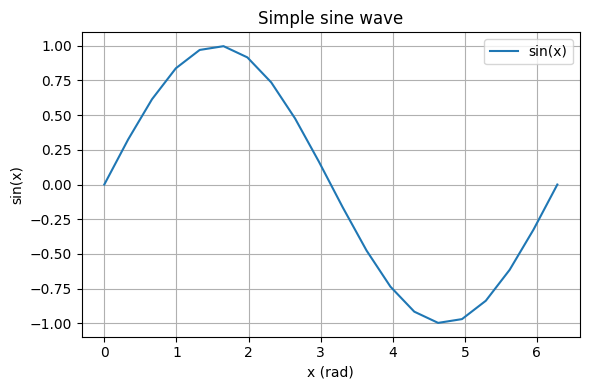

In [3]:
# 11.1.0 Example: basic OO plot, tight_layout, and saving to file

import numpy as np
import matplotlib.pyplot as plt

# Synthetic data: simple sine wave
x = np.linspace(0, 2 * np.pi, 20)
print(x)
y = np.sin(x)
print(y)

# Create Figure and Axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot on the Axes
ax.plot(x, y, label="sin(x)")

# Configure labels and title
ax.set_xlabel("x (rad)")
ax.set_ylabel("sin(x)")
ax.set_title("Simple sine wave")
ax.grid(True)
ax.legend()

# Adjust layout so labels and title fit nicely
fig.tight_layout()

# Save to file (PNG and PDF)
fig.savefig("sine_wave_example.png", dpi=150)
fig.savefig("sine_wave_example.pdf")

# Show on screen (in a notebook this appears below the cell)
plt.show()


### ✏ Exercise 11.1.1 (easy): Plot a voltage-time curve

In this exercise you will practice the **OO-style** plotting with matplotlib.

Use the pre-defined `time_s` and `voltage_v` data in the starter code to:

1. Create a Figure and Axes with `fig, ax = plt.subplots(...)`.
2. Plot `voltage_v` versus `time_s` using `ax.plot(...)` and markers.
3. Add axis labels, a title, and a grid.
4. Call `fig.tight_layout()` and then `plt.show()`.

Everything you need (OO API, `tight_layout`, labels, grid) is shown in the example above.


In [ ]:
# TODO: implement Exercise 11.1.1

import numpy as np
import matplotlib.pyplot as plt

# Given measurement data: time and voltage
time_s = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
voltage_v = np.array([0.1, 0.5, 1.2, 1.8, 2.1, 2.0, 1.7, 1.3, 0.8, 0.3])

# 1) Create Figure and Axes
# fig, ax = plt.subplots(figsize=(6, 4))

# 2) Plot voltage_v vs time_s with markers
# ax.plot(...)

# 3) Set labels, title, and grid
# ax.set_xlabel("...")
# ax.set_ylabel("...")
# ax.set_title("...")
# ax.grid(True)

# 4) Use tight_layout and show
# fig.tight_layout()
# plt.show()


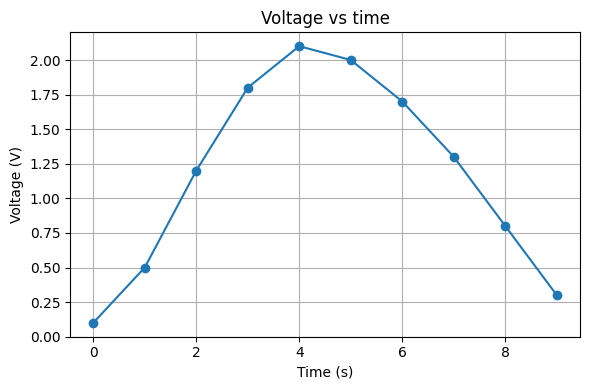

In [4]:
# Reference solution for Exercise 11.1.1

import numpy as np
import matplotlib.pyplot as plt

# Given measurement data: time and voltage
time_s = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
voltage_v = np.array([0.1, 0.5, 1.2, 1.8, 2.1, 2.0, 1.7, 1.3, 0.8, 0.3])

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(time_s, voltage_v, marker="o")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")
ax.set_title("Voltage vs time")
ax.grid(True)

fig.tight_layout()
plt.show()


### 11.2 Subplots and histograms

A single Figure can hold **multiple Axes** (subplots). The most common way to create them is:

- `fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))`
  - `axes` is a NumPy array of Axes objects: `axes[0]`, `axes[1]`, etc.

Histograms are a standard tool in physics for visualizing distributions:

- `ax.hist(data, bins=30)` computes the histogram and draws it as bars.

Below we show an example where:

- The top subplot shows a noisy sine wave.
- The bottom subplot shows a histogram of the noise values.


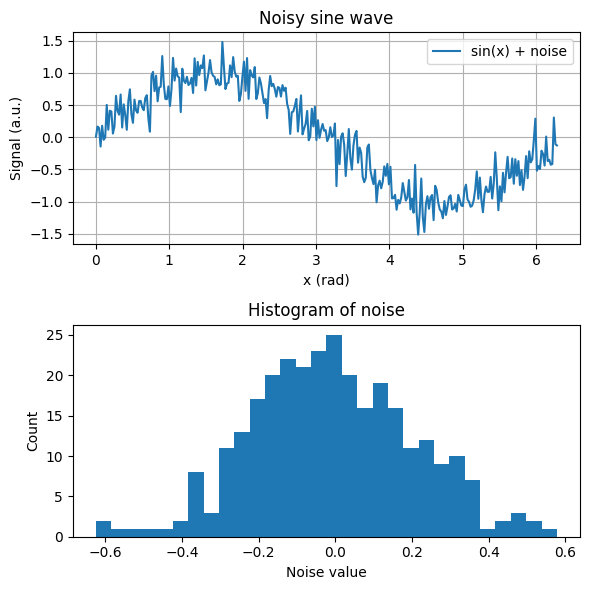

In [7]:
# 11.2.0 Example: subplots and histogram

import numpy as np
import matplotlib.pyplot as plt

# Synthetic signal: sine wave with Gaussian noise
x = np.linspace(0, 2 * np.pi, 300)
noise = np.random.normal(loc=0.0, scale=0.2, size=x.shape)
y = np.sin(x) + noise

# Create a 2x1 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

# Top subplot: signal vs x
axes[0].plot(x, y, label="sin(x) + noise")
axes[0].set_xlabel("x (rad)")
axes[0].set_ylabel("Signal (a.u.)")
axes[0].set_title("Noisy sine wave")
axes[0].grid(True)
axes[0].legend()

# Bottom subplot: histogram of noise
axes[1].hist(noise, bins=30)
axes[1].set_xlabel("Noise value")
axes[1].set_ylabel("Count")
axes[1].set_title("Histogram of noise")

fig.tight_layout()
plt.show()


### ⚡ Exercise 11.1.2 (advanced): Two subplots - signal and histogram

In this exercise you will combine **subplots** and a **histogram**.

Use the pre-defined `time_s` and `current_mA` arrays in the starter code to:

1. Create a figure with 2 rows and 1 column of subplots using `fig, axes = plt.subplots(nrows=2, ncols=1, ...)`.
2. In the first Axes (`axes[0]`), plot `current_mA` vs `time_s` as a line with markers and grid.
3. In the second Axes (`axes[1]`), draw a histogram of `current_mA` using `axes[1].hist(...)`.
4. Add axis labels and titles to both subplots.
5. Call `fig.tight_layout()` and `plt.show()`.

All needed pieces (subplots, hist, labels, grid, tight_layout) are demonstrated in the example above.


In [ ]:
# TODO: implement Exercise 11.1.2

import numpy as np
import matplotlib.pyplot as plt

# Given time and current measurement data
time_s = np.arange(0, 20)  # 0, 1, ..., 19
current_mA = np.array([
    5.1, 5.2, 5.0, 5.3, 5.4, 5.2, 5.1, 5.5, 5.6, 5.3,
    5.2, 5.0, 4.9, 5.1, 5.3, 5.4, 5.2, 5.1, 5.0, 4.8,
])

# 1) Create 2x1 subplots
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

# 2) Top subplot: current vs time
# axes[0].plot(...)
# axes[0].set_xlabel("...")
# axes[0].set_ylabel("...")
# axes[0].set_title("...")
# axes[0].grid(True)

# 3) Bottom subplot: histogram of current values
# axes[1].hist(...)
# axes[1].set_xlabel("...")
# axes[1].set_ylabel("...")
# axes[1].set_title("...")

# 4) Layout and show
# fig.tight_layout()
# plt.show()


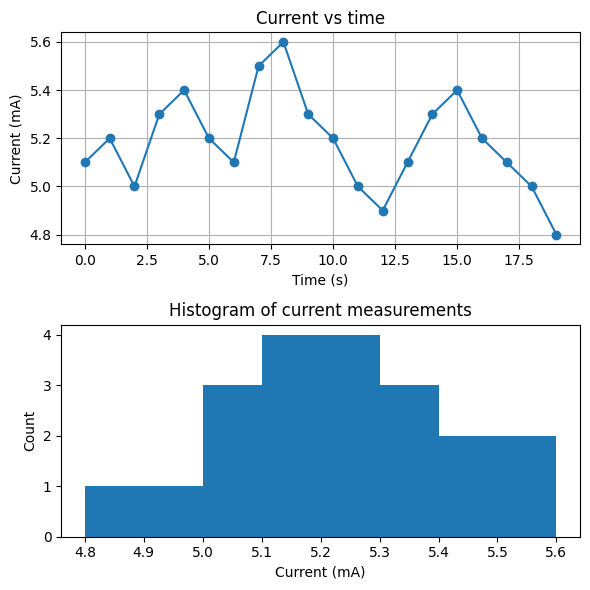

In [8]:
# Reference solution for Exercise 11.1.2

import numpy as np
import matplotlib.pyplot as plt

# Given time and current measurement data
time_s = np.arange(0, 20)
current_mA = np.array([
    5.1, 5.2, 5.0, 5.3, 5.4, 5.2, 5.1, 5.5, 5.6, 5.3,
    5.2, 5.0, 4.9, 5.1, 5.3, 5.4, 5.2, 5.1, 5.0, 4.8,
])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

# Top subplot
axes[0].plot(time_s, current_mA, marker="o")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Current (mA)")
axes[0].set_title("Current vs time")
axes[0].grid(True)

# Bottom subplot
axes[1].hist(current_mA, bins=8)
axes[1].set_xlabel("Current (mA)")
axes[1].set_ylabel("Count")
axes[1].set_title("Histogram of current measurements")

fig.tight_layout()
plt.show()


### 11.3 2D point cloud

In 2D, a common task is to visualize a **cloud of points** and get a feeling for the **density** of points in different regions.

Typical tools:

- `ax.scatter(x, y, ...)` for a simple 2D scatter plot.
- `ax.hist2d(x, y, bins=(nx, ny))` for a 2D histogram heatmap.

Below we:

- Generate a 2D Gaussian-like point cloud.
- Visualize it as a scatter plot.
- Visualize it as a 2D histogram.

Docs:

- 2D histograms: https://matplotlib.org/stable/gallery/statistics/hist2d_log_demo.html
- Scatter plots: https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html


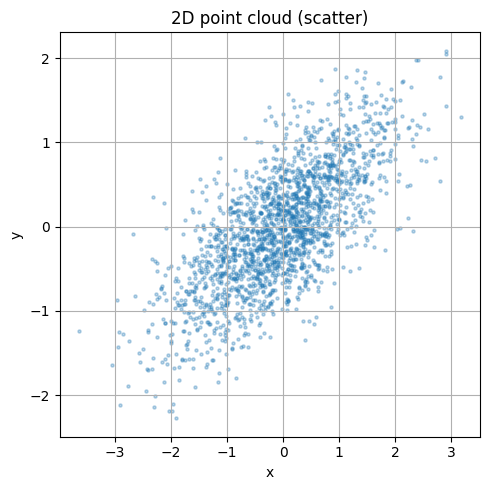

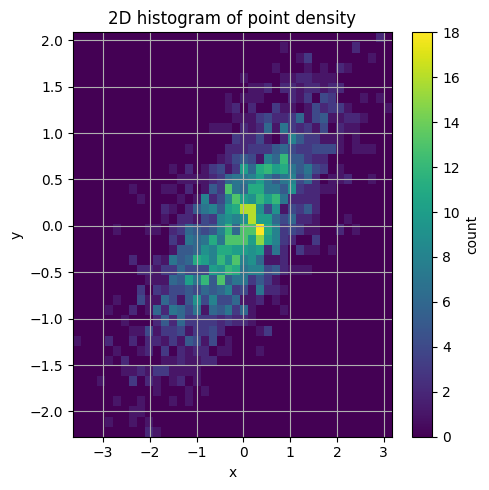

In [10]:
# 11.3.0 Example: 2D point cloud and density visualization

import numpy as np
import matplotlib.pyplot as plt

# Generate a 2D Gaussian-like cloud
rng = np.random.default_rng(42)
x = rng.normal(loc=0.0, scale=1.0, size=2000)
y = rng.normal(loc=0.0, scale=0.5, size=2000) + 0.5 * x

# 1) Simple scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x, y, s=5, alpha=0.3)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("2D point cloud (scatter)")
ax.grid(True)
fig.tight_layout()
plt.show()

# 2) 2D histogram heatmap
fig, ax = plt.subplots(figsize=(5, 5))

h = ax.hist2d(x, y, bins=40)
fig.colorbar(h[3], ax=ax, label="count")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("2D histogram of point density")
ax.grid(True)
fig.tight_layout()
plt.show()

### 11.4 pandas integration with matplotlib

pandas does not implement its own plotting engine. Instead, it uses matplotlib under the hood.

Key points:

- `Series.plot(...)` and `DataFrame.plot(...)` are **convenience wrappers** around matplotlib.
- If no Axes is given, pandas will create a new Figure and Axes for you.
- The plotting method returns the `Axes` object so you can continue customizing it.

Examples:

- `df["value"].plot(kind="hist")` creates a histogram of one column.
- `df.plot(x="time_s", y="signal", kind="line")` plots a line.
- You can pass an existing Axes: `df.plot(..., ax=axes[0])` to integrate into a multi-panel figure.

Docs:

- pandas visualization: https://pandas.pydata.org/docs/user_guide/visualization.html


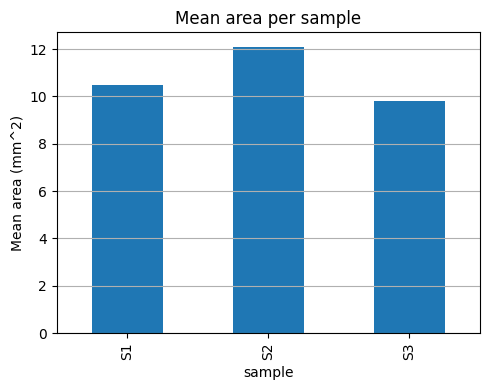

In [11]:
# 11.4.0 Example: pandas + matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame: mean area per sample
plot_df = pd.DataFrame([
    {"sample": "S1", "mean_area": 10.5},
    {"sample": "S2", "mean_area": 12.1},
    {"sample": "S3", "mean_area": 9.8},
])

# Use pandas to create a bar plot, still getting the Axes back
fig, ax = plt.subplots(figsize=(5, 4))
ax = plot_df.plot(x="sample", y="mean_area", kind="bar", legend=False, ax=ax)

ax.set_ylabel("Mean area (mm^2)")
ax.set_title("Mean area per sample")
ax.grid(axis="y")

fig.tight_layout()
plt.show()


### ✏ Exercise 11.4.1 (easy): Histogram of measurement values with pandas

In this exercise you will use **pandas plotting** but focus only on the plotting, not on data creation.

Using the pre-defined DataFrame `df` in the starter code:

1. Plot a histogram of the `value` column using `df["value"].plot(kind="hist", bins=...)`.
2. Capture the returned Axes in a variable `ax`.
3. Label the x axis as "Value", y axis as "Frequency", and set a suitable title.
4. Call `plt.tight_layout()` and `plt.show()`.

All required ideas (pandas `.plot`, histogram, axis labels, titles) have been shown above.


In [ ]:
# TODO: implement Exercise 11.4.1

import pandas as pd
import matplotlib.pyplot as plt

# Given measurement values
values = [
    10.1, 10.3, 9.8, 10.0, 10.5, 9.9, 10.2, 10.4, 9.7, 10.1,
    10.3, 9.8, 10.0, 10.5, 9.9, 10.2, 10.4, 9.7, 10.1, 10.3,
]

df = pd.DataFrame({"value": values})

# 1) Create a histogram of df["value"] using pandas
# ax = df["value"].plot(kind="hist", bins=10)

# 2) Set labels and title
# ax.set_xlabel("...")
# ax.set_ylabel("...")
# ax.set_title("...")

# 3) Layout and show
# plt.tight_layout()
# plt.show()


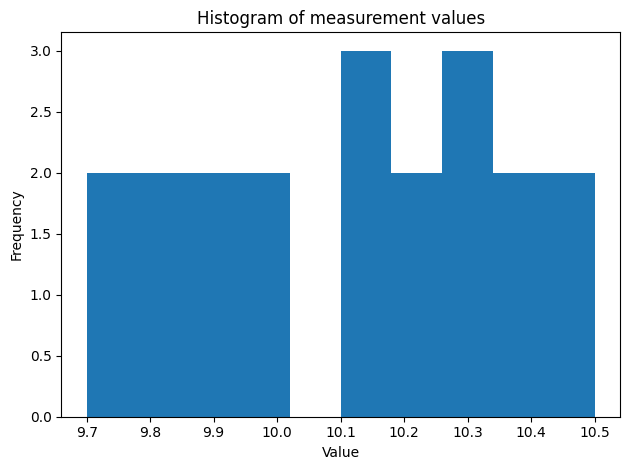

In [12]:
# Reference solution for Exercise 11.4.1

import pandas as pd
import matplotlib.pyplot as plt

values = [
    10.1, 10.3, 9.8, 10.0, 10.5, 9.9, 10.2, 10.4, 9.7, 10.1,
    10.3, 9.8, 10.0, 10.5, 9.9, 10.2, 10.4, 9.7, 10.1, 10.3,
]

df = pd.DataFrame({"value": values})

ax = df["value"].plot(kind="hist", bins=10)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of measurement values")

plt.tight_layout()
plt.show()


### ⚡ Exercise 11.4.2 (advanced): Bar chart of mean value per sample

In this exercise you combine **groupby** and **pandas plotting**.

Using the pre-defined DataFrame `df` in the starter code:

1. Compute the mean `value` per `sample` using `mean_by_sample = df.groupby("sample")["value"].mean()`.
2. Plot `mean_by_sample` as a bar chart using `mean_by_sample.plot(kind="bar")`.
3. Capture the returned Axes in `ax` and set:
   - x axis label to "Sample",
   - y axis label to "Mean value",
   - a suitable title like "Mean value per sample".
4. Call `plt.tight_layout()` and `plt.show()`.

All required concepts (groupby, `.mean()`, series `.plot(kind="bar")`) have appeared earlier in the data handling sections.


In [ ]:
# TODO: implement Exercise 11.4.2

import pandas as pd
import matplotlib.pyplot as plt

# Given measurements from multiple samples
rows = [
    {"sample": "S1", "value": 10.2},
    {"sample": "S1", "value": 10.4},
    {"sample": "S1", "value": 10.1},
    {"sample": "S2", "value": 9.8},
    {"sample": "S2", "value": 9.9},
    {"sample": "S2", "value": 10.0},
    {"sample": "S3", "value": 10.5},
    {"sample": "S3", "value": 10.3},
]

df = pd.DataFrame(rows)

# 1) Compute mean value per sample
# mean_by_sample = df.groupby("sample")["value"].mean()

# 2) Plot as bar chart
# ax = mean_by_sample.plot(kind="bar")

# 3) Set labels and title
# ax.set_xlabel("...")
# ax.set_ylabel("...")
# ax.set_title("...")

# 4) Layout and show
# plt.tight_layout()
# plt.show()


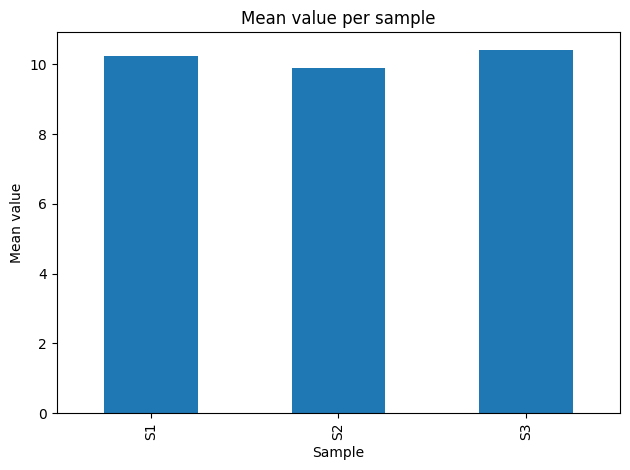

In [13]:
# Reference solution for Exercise 11.4.2

import pandas as pd
import matplotlib.pyplot as plt

rows = [
    {"sample": "S1", "value": 10.2},
    {"sample": "S1", "value": 10.4},
    {"sample": "S1", "value": 10.1},
    {"sample": "S2", "value": 9.8},
    {"sample": "S2", "value": 9.9},
    {"sample": "S2", "value": 10.0},
    {"sample": "S3", "value": 10.5},
    {"sample": "S3", "value": 10.3},
]

df = pd.DataFrame(rows)

mean_by_sample = df.groupby("sample")["value"].mean()

ax = mean_by_sample.plot(kind="bar")
ax.set_xlabel("Sample")
ax.set_ylabel("Mean value")
ax.set_title("Mean value per sample")

plt.tight_layout()
plt.show()


---
# Short break (14:45 - 15:00)

Last short break before the big combined example.
---

## 12. Complex example: Scientific surface size measurements

In this final example we combine everything from today:

- Comprehensions and generator expressions
- SQLAlchemy ORM with SQLite
- pandas DataFrame operations
- Excel input/output
- Groupby, merge, and plotting

### Scenario

A lab measures the **surface area** of samples using multiple methods:

- `optical` method
- `contact` method
- `afm` (atomic force microscopy) method

Each measurement has:

- `sample_name`
- `method`
- `area_mm2` (surface area in square millimeters)
- `run_id` (which experimental run it belongs to)

We will:

1. Start from a list of raw measurement dicts in Python.
2. Use comprehensions to clean and filter the data.
3. Insert the cleaned data into an SQLite database with SQLAlchemy.
4. Load the data into pandas using `read_sql_query`.
5. Compute statistics per sample and per method with `groupby`.
6. Save aggregated results to Excel.
7. Plot a bar chart comparing methods.


### 💪 Exercise 12.1 (full pipeline): From raw measurements to plots

Follow the steps below inside the code cell. Use only concepts we have seen today.

1. **Raw data and cleaning**
   - Create a list `raw_measurements` of dicts with keys `"sample_name"`, `"method"`, `"area_mm2"`, `"run_id"`.
   - Include some messy entries:
     - Sample names with extra spaces
     - At least one measurement with a negative or zero area that you will later drop
   - Use a **list comprehension** to build a new list `clean_measurements` where:
     - Sample names are stripped of whitespace and uppercased (or lowercased, but be consistent).
     - You keep only entries with `area_mm2` > 0.

2. **Insert into SQLite with SQLAlchemy**
   - Define two models `Sample2` and `SurfaceMeasurement` (to avoid name clashes with earlier models):
     - `Sample2` with `id`, `name`.
     - `SurfaceMeasurement` with `id`, `sample_id`, `method`, `area_mm2`, `run_id`.
   - Use a new Base (for example `Base2 = declarative_base()`) and a separate engine (`sqlite:///surface_measurements.db`).
   - Insert all distinct samples into the `Sample2` table.
   - Insert all measurements into `SurfaceMeasurement` using the correct `sample_id`.

3. **Load into pandas**
   - Use `pd.read_sql_query` with a `JOIN` between `SurfaceMeasurement` and `Sample2` so that you have columns `sample_name`, `method`, `area_mm2`, `run_id` in a DataFrame `df`.

4. **Analyze with pandas**
   - Compute mean area per `(sample_name, method)` using `groupby`.
   - Reset the index so the result is a clean DataFrame.
   - Save the aggregated result to an Excel file `surface_mean_by_sample_and_method.xlsx`.

5. **Visualize**
   - For one selected sample (for example "SAMPLE_A"), filter the aggregated DataFrame.
   - Plot a bar chart showing mean area per method for that sample.
   - Label axes and add a title.

Try to write the solution in logical steps, adding print statements as needed to understand what is happening.


In [ ]:
# TODO: implement Exercise 12.1 - full pipeline

# 1. Raw data and cleaning
# raw_measurements = [
#     {"sample_name": "  Sample_A ", "method": "optical", "area_mm2": 10.2, "run_id": 1},
#     ...
# ]
# clean_measurements = [...]  # list comprehension for cleaning and filtering

# 2. Insert into SQLite with SQLAlchemy
# from sqlalchemy import create_engine, Column, Integer, String, Float, ForeignKey
# from sqlalchemy.orm import declarative_base, sessionmaker

# Base2 = declarative_base()

# class Sample2(Base2):
#     ...

# class SurfaceMeasurement(Base2):
#     ...

# engine2 = create_engine("sqlite:///surface_measurements.db", echo=False, future=True)
# Base2.metadata.create_all(engine2)
# Session2 = sessionmaker(bind=engine2, future=True)
# session2 = Session2()

# # Insert distinct samples
# ...

# # Insert measurements with sample_id
# ...
# session2.commit()

# 3. Load into pandas with JOIN
# sql = "..."  # SELECT with JOIN
# df = pd.read_sql_query(sql, con=engine2)
# print(df.head())

# 4. Analyze with pandas
# grouped = ...
# grouped_reset = ...
# grouped_reset.to_excel("surface_mean_by_sample_and_method.xlsx", index=False)

# 5. Visualize for one sample
# one_sample = ...  # filter grouped_reset
# ax = one_sample.plot(x="method", y="mean_area_mm2", kind="bar")
# ax.set_xlabel("Method")
# ax.set_ylabel("Mean area (mm^2)")
# ax.set_title("Mean area per method for one sample")
# plt.tight_layout()
# plt.show()


Clean measurements:
[{'sample_name': 'SAMPLE_A', 'method': 'optical', 'area_mm2': 10.2, 'run_id': 1}, {'sample_name': 'SAMPLE_A', 'method': 'contact', 'area_mm2': 9.8, 'run_id': 1}, {'sample_name': 'SAMPLE_B', 'method': 'optical', 'area_mm2': 15.0, 'run_id': 1}, {'sample_name': 'SAMPLE_B', 'method': 'afm', 'area_mm2': 14.5, 'run_id': 2}, {'sample_name': 'SAMPLE_C', 'method': 'optical', 'area_mm2': 8.5, 'run_id': 2}]
Joined DataFrame:
   id sample_name   method  area_mm2  run_id
0   1    SAMPLE_A  optical      10.2       1
1   2    SAMPLE_A  contact       9.8       1
2   3    SAMPLE_B  optical      15.0       1
3   4    SAMPLE_B      afm      14.5       2
4   5    SAMPLE_C  optical       8.5       2

Mean area per sample and method:
  sample_name   method  mean_area_mm2
0    SAMPLE_A  contact            9.8
1    SAMPLE_A  optical           10.2
2    SAMPLE_B      afm           14.5
3    SAMPLE_B  optical           15.0
4    SAMPLE_C  optical            8.5
Saved aggregated results to su

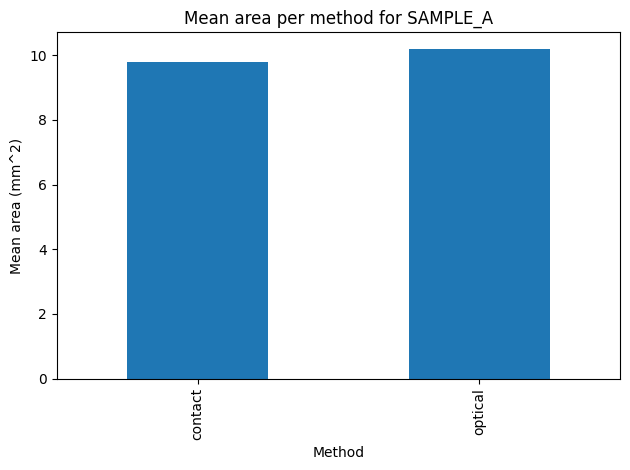

In [43]:
# Reference solution for Exercise 12.1

from sqlalchemy import create_engine as create_engine2, Column as Column2, Integer as Integer2, String as String2, Float as Float2, ForeignKey as ForeignKey2
from sqlalchemy.orm import declarative_base as declarative_base2, sessionmaker as sessionmaker2

# 1. Raw data and cleaning
raw_measurements = [
    {"sample_name": "  Sample_A ", "method": "optical", "area_mm2": 10.2, "run_id": 1},
    {"sample_name": "Sample_A", "method": "contact", "area_mm2": 9.8, "run_id": 1},
    {"sample_name": "sample_b", "method": "optical", "area_mm2": 15.0, "run_id": 1},
    {"sample_name": "Sample_B ", "method": "afm", "area_mm2": 14.5, "run_id": 2},
    {"sample_name": " Sample_C", "method": "optical", "area_mm2": 0.0, "run_id": 1},  # invalid
    {"sample_name": "Sample_C", "method": "optical", "area_mm2": 8.5, "run_id": 2},
]

clean_measurements = [
    {
        "sample_name": m["sample_name"].strip().upper(),
        "method": m["method"],
        "area_mm2": m["area_mm2"],
        "run_id": m["run_id"],
    }
    for m in raw_measurements
    if m["area_mm2"] > 0
]

print("Clean measurements:")
print(clean_measurements)

# 2. Insert into SQLite with SQLAlchemy
Base2 = declarative_base2()

class Sample2(Base2):
    __tablename__ = "samples2"

    id = Column2(Integer2, primary_key=True)
    name = Column2(String2, nullable=False, unique=True)


class SurfaceMeasurement(Base2):
    __tablename__ = "surface_measurements"

    id = Column2(Integer2, primary_key=True)
    sample_id = Column2(Integer2, ForeignKey2("samples2.id"), nullable=False)
    method = Column2(String2, nullable=False)
    area_mm2 = Column2(Float2, nullable=False)
    run_id = Column2(Integer2, nullable=False)


engine2 = create_engine2("sqlite:///surface_measurements.db", echo=False, future=True)
Base2.metadata.create_all(engine2)
Session2 = sessionmaker2(bind=engine2, future=True)
session2 = Session2()

# Insert distinct samples
sample_names = {m["sample_name"] for m in clean_measurements}
name_to_id = {}
for name in sample_names:
    s = Sample2(name=name)
    session2.add(s)
    session2.flush()  # get id without full commit
    name_to_id[name] = s.id

# Insert measurements
for m in clean_measurements:
    sm = SurfaceMeasurement(
        sample_id=name_to_id[m["sample_name"]],
        method=m["method"],
        area_mm2=m["area_mm2"],
        run_id=m["run_id"],
    )
    session2.add(sm)

session2.commit()

# 3. Load into pandas with JOIN
sql = (
    "SELECT sm.id, s.name AS sample_name, sm.method, sm.area_mm2, sm.run_id "
    "FROM surface_measurements AS sm "
    "JOIN samples2 AS s ON sm.sample_id = s.id"
)

df = pd.read_sql_query(sql, con=engine2)
print("Joined DataFrame:")
print(df)

# 4. Analyze with pandas
grouped = df.groupby(["sample_name", "method"])["area_mm2"].mean()

grouped_reset = grouped.reset_index().rename(columns={"area_mm2": "mean_area_mm2"})
print("\nMean area per sample and method:")
print(grouped_reset)

output_excel = "surface_mean_by_sample_and_method.xlsx"
grouped_reset.to_excel(output_excel, index=False)
print(f"Saved aggregated results to {output_excel}")

# 5. Visualize for one sample
one_sample_name = "SAMPLE_A"
one_sample = grouped_reset[grouped_reset["sample_name"] == one_sample_name]

if not one_sample.empty:
    ax = one_sample.plot(x="method", y="mean_area_mm2", kind="bar", legend=False)
    ax.set_xlabel("Method")
    ax.set_ylabel("Mean area (mm^2)")
    ax.set_title(f"Mean area per method for {one_sample_name}")
    plt.tight_layout()
    plt.show()
else:
    print(f"No data for sample {one_sample_name}")

engine2.dispose()

## 13. Day 2 summary

Today we covered a lot of ground around **data handling** and **databases**:

- **Comprehensions and generator expressions**
  - List, dict, and set comprehensions as compact map + filter tools.
  - Conditional and nested comprehensions for simple flattening and combinations.
  - Generator expressions for lazy, memory efficient pipelines.

- **Relational databases and SQLAlchemy**
  - Basic ideas of tables, primary keys, and foreign keys.
  - Using SQLite as an embedded database.
  - Creating an engine, defining models with a declarative base.
  - Using sessions to perform CRUD operations.

- **pandas DataFrame basics**
  - Creating DataFrames from dicts and from SQL tables.
  - Inspecting data with `head`, `info`, and `describe`.
  - Selecting, filtering, and creating derived columns.

- **pandas and SQL**
  - Loading tables and queries with `read_sql_table` and `read_sql_query`.
  - Combining SQL for storage and pandas for analysis.

- **Excel (xlsx) integration**
  - Exporting DataFrames with `to_excel` and reading them back with `read_excel`.

- **Groupby, aggregation, and joins**
  - Summaries with `groupby` and `agg`.
  - Joining tables with `pd.merge` to enrich measurement data with sample metadata.

- **Visualization with matplotlib**
  - Quick plotting from pandas Series and DataFrames (histograms, bar charts).
  - Labeling axes and adding titles.

- **Complex pipeline example**
  - Cleaning scientific measurement data with comprehensions.
  - Storing them in SQLite with SQLAlchemy.
  - Loading them into pandas, aggregating per sample and method.
  - Exporting results to Excel and plotting mean values.

These patterns are very close to what real-world data analysis and scientific scripting looks like in Python. In the next days we will build on this foundation with parallel computing and deep learning.
